North America: 

AU: AU01_r Emotion: Disgust


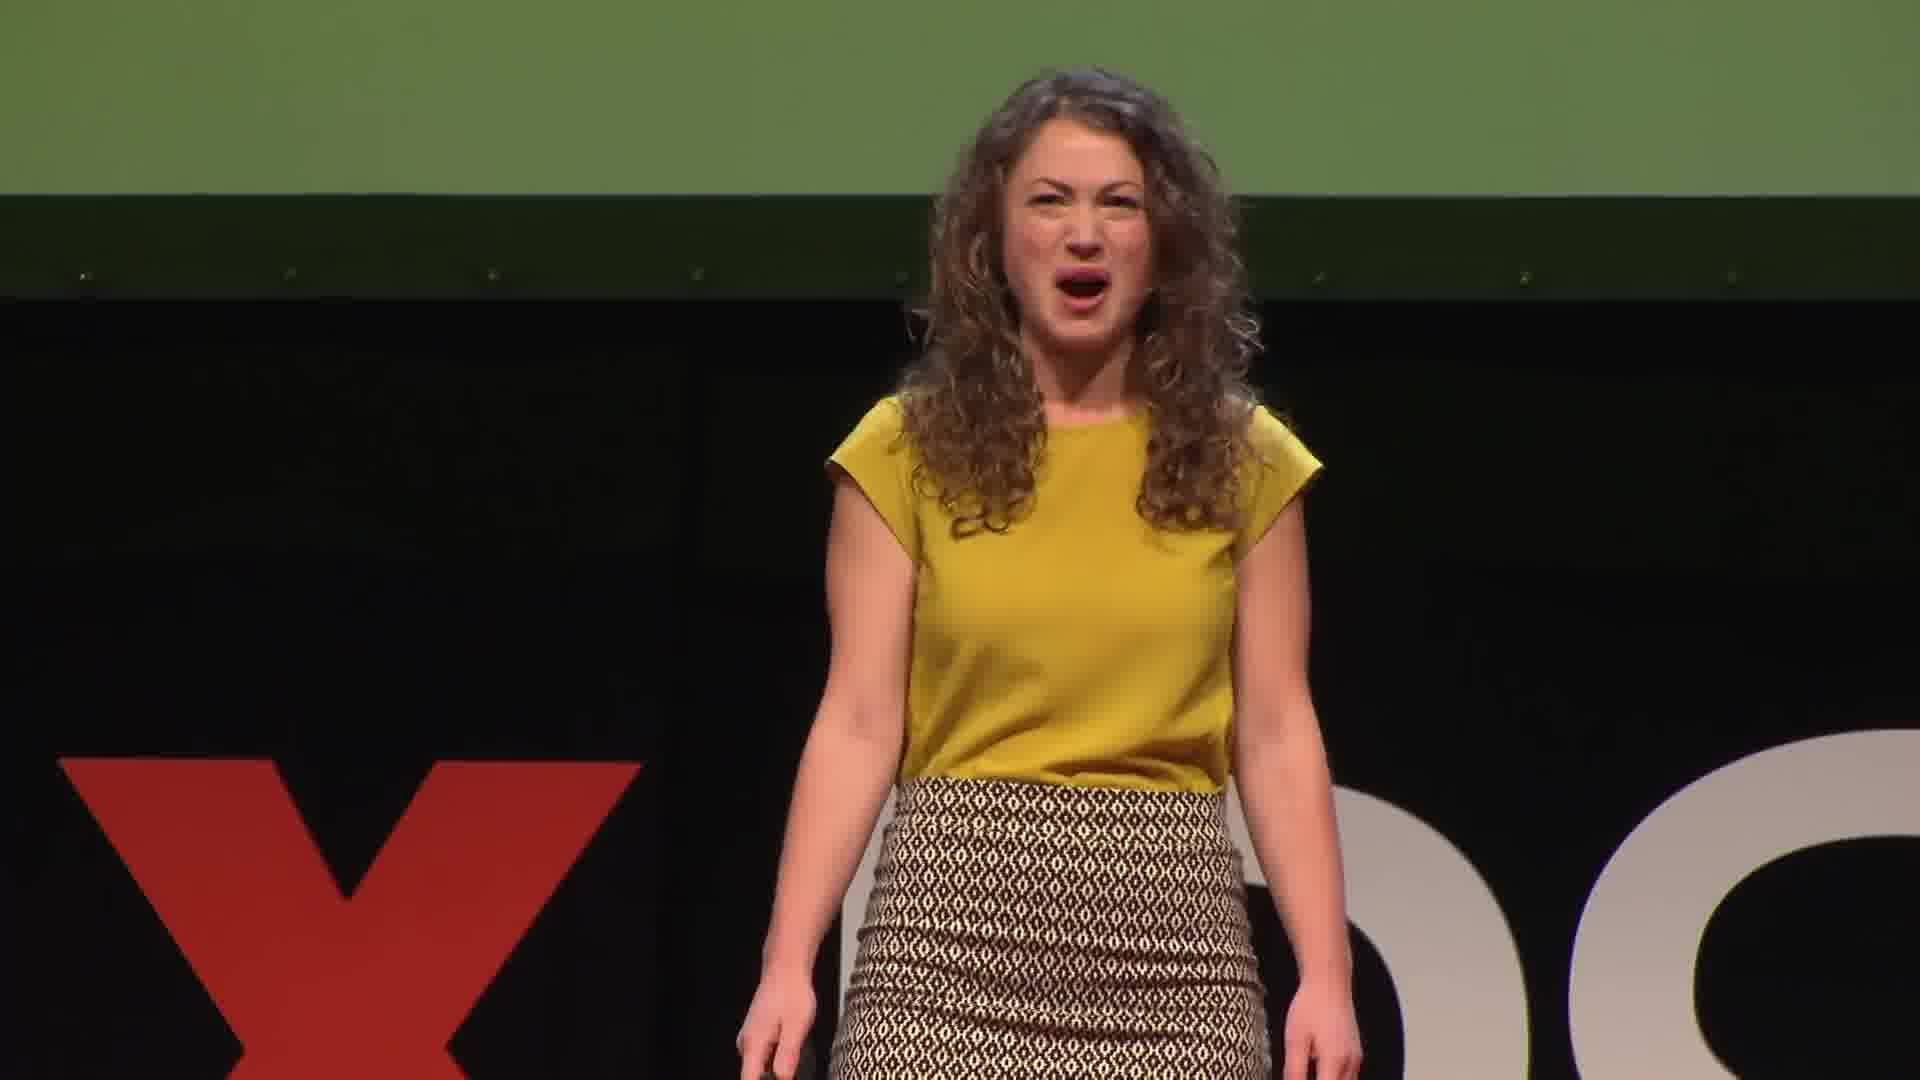

AU: AU04_r Emotion: Anger


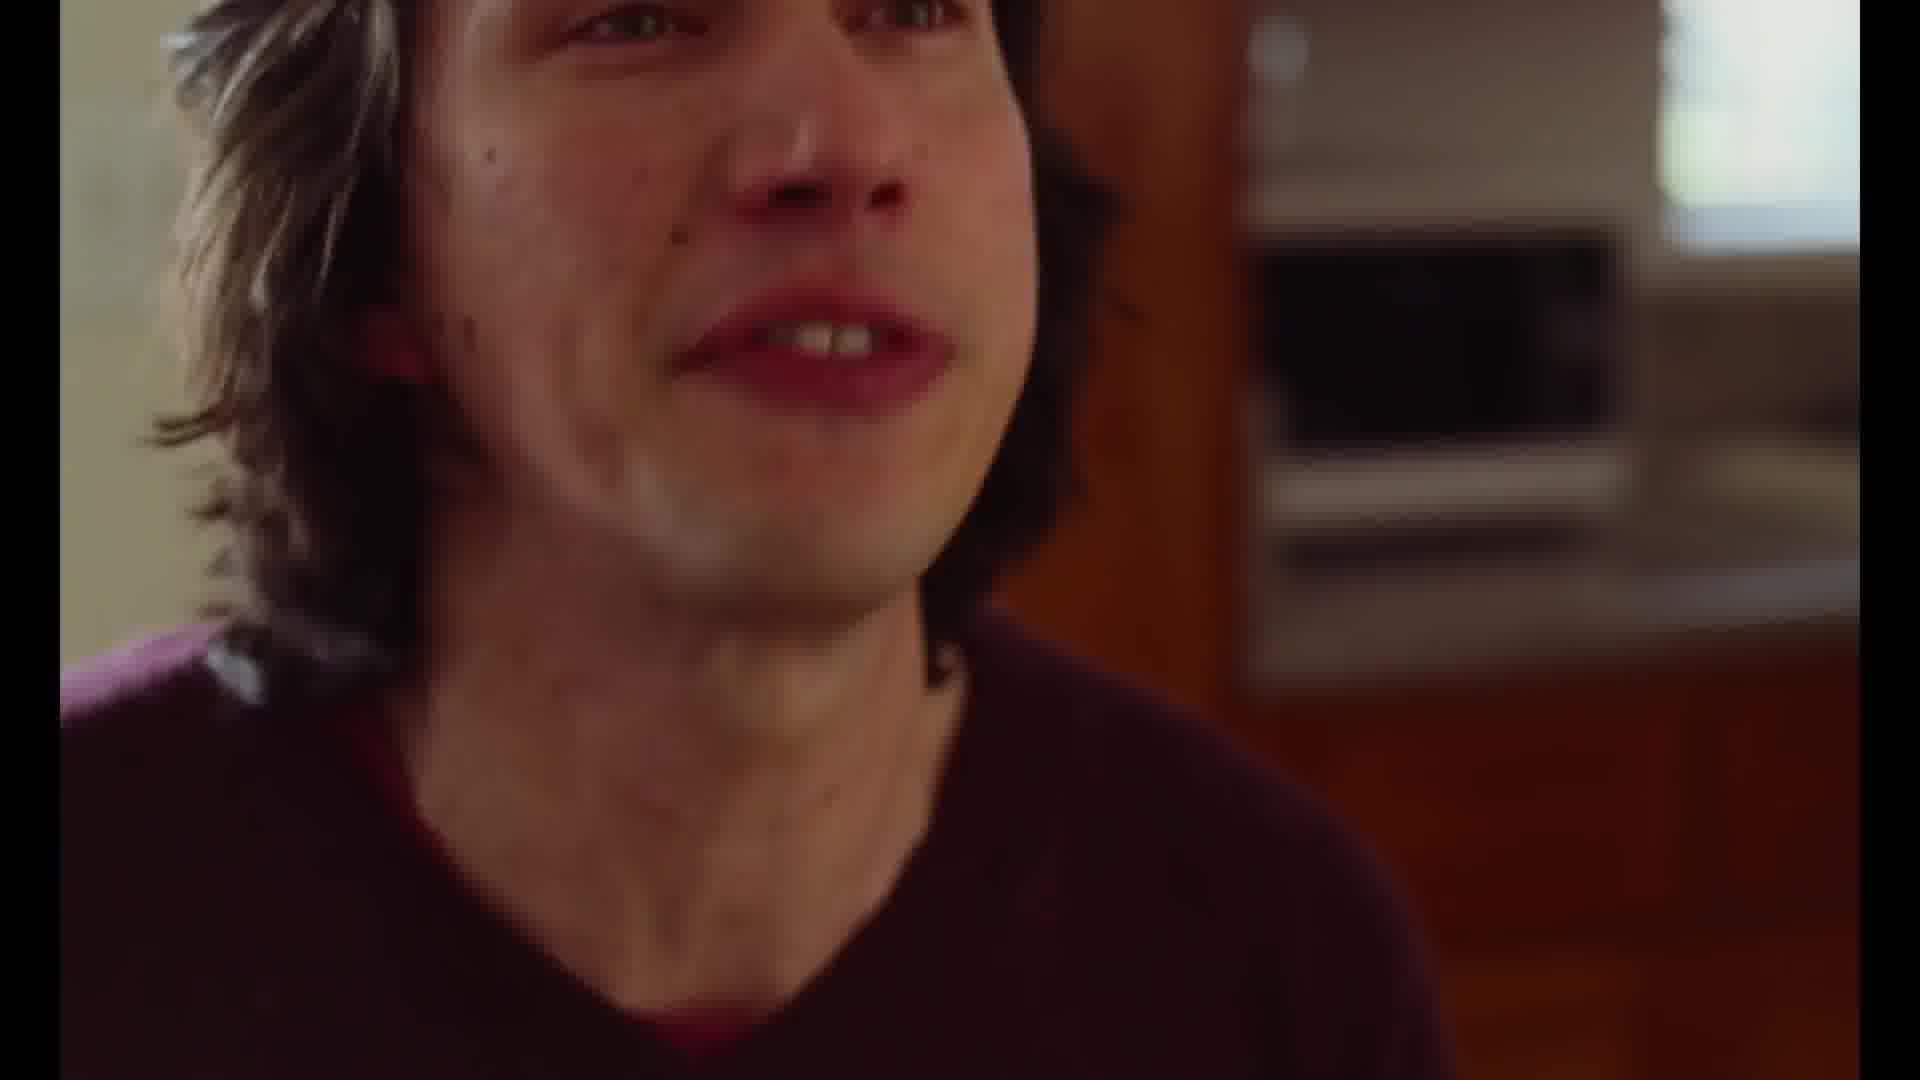

AU: AU07_r Emotion: Anger


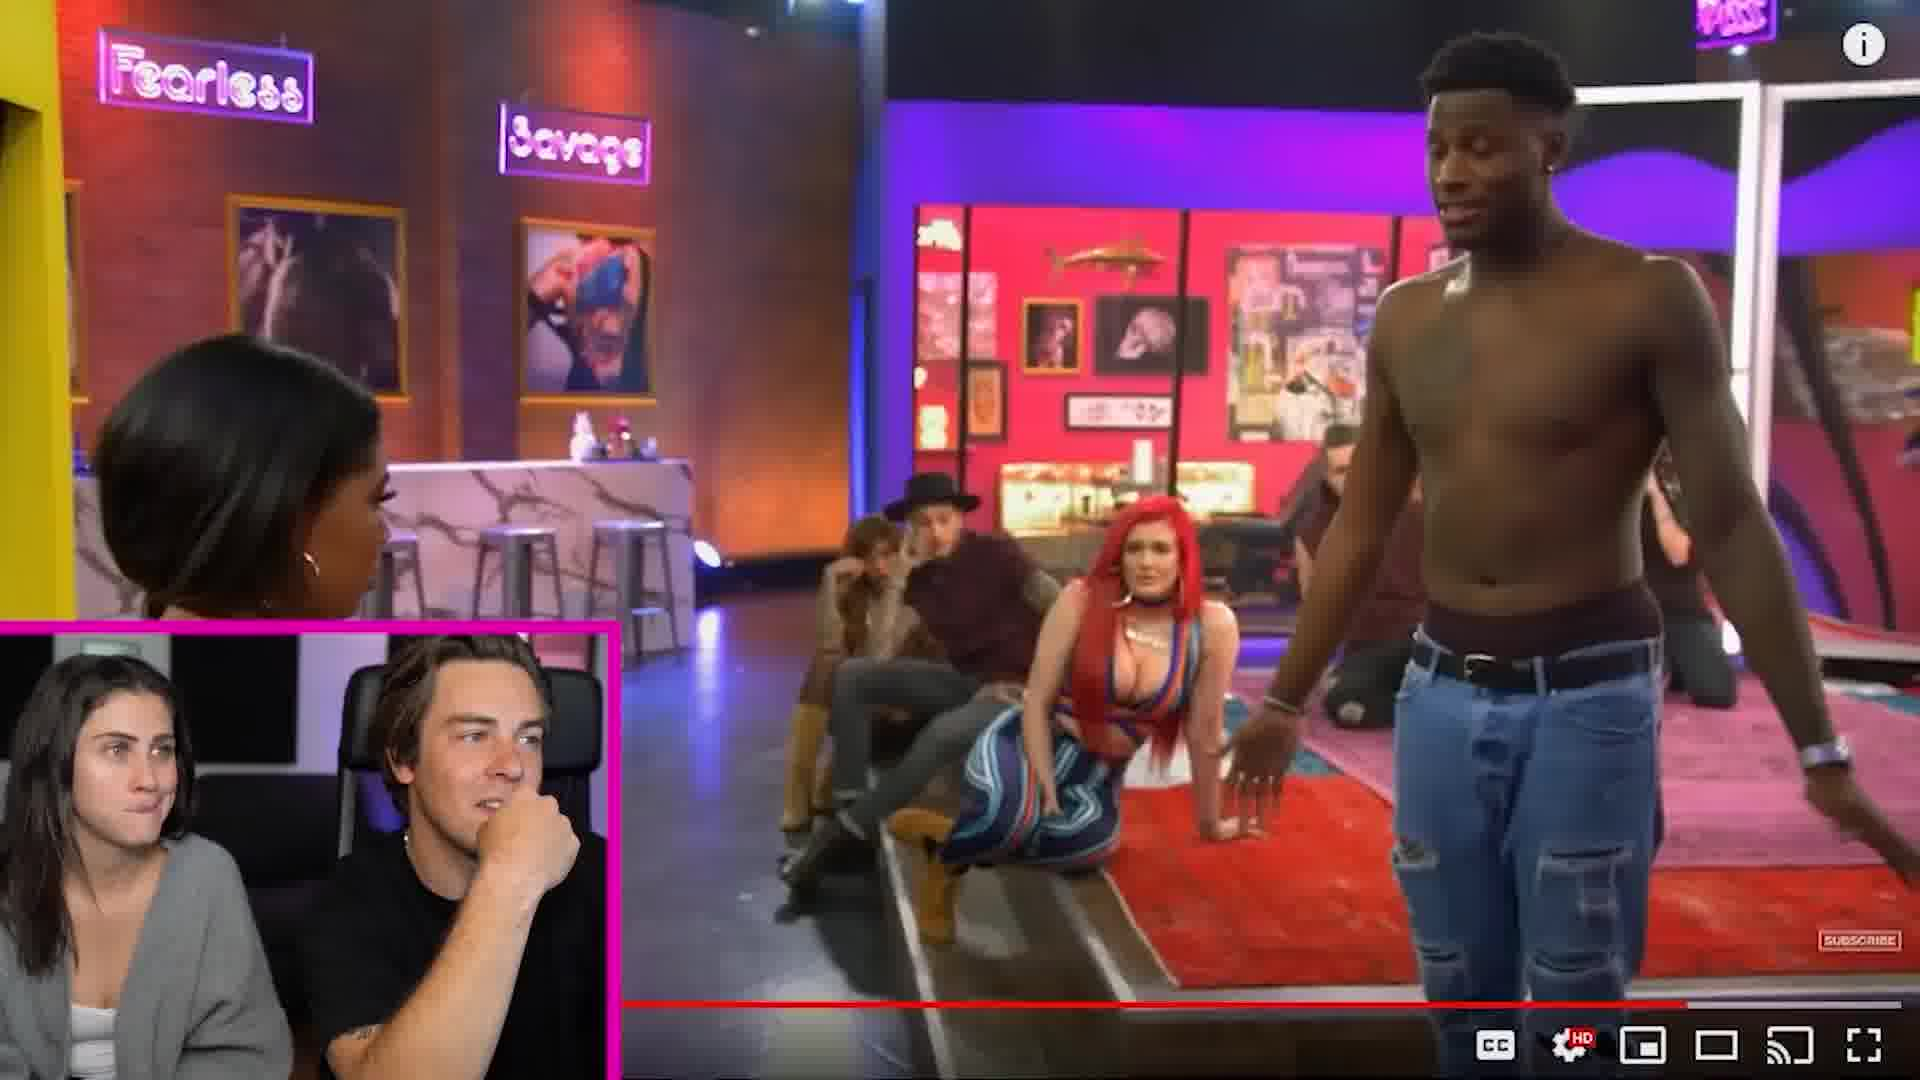

AU: AU10_r Emotion: Anger


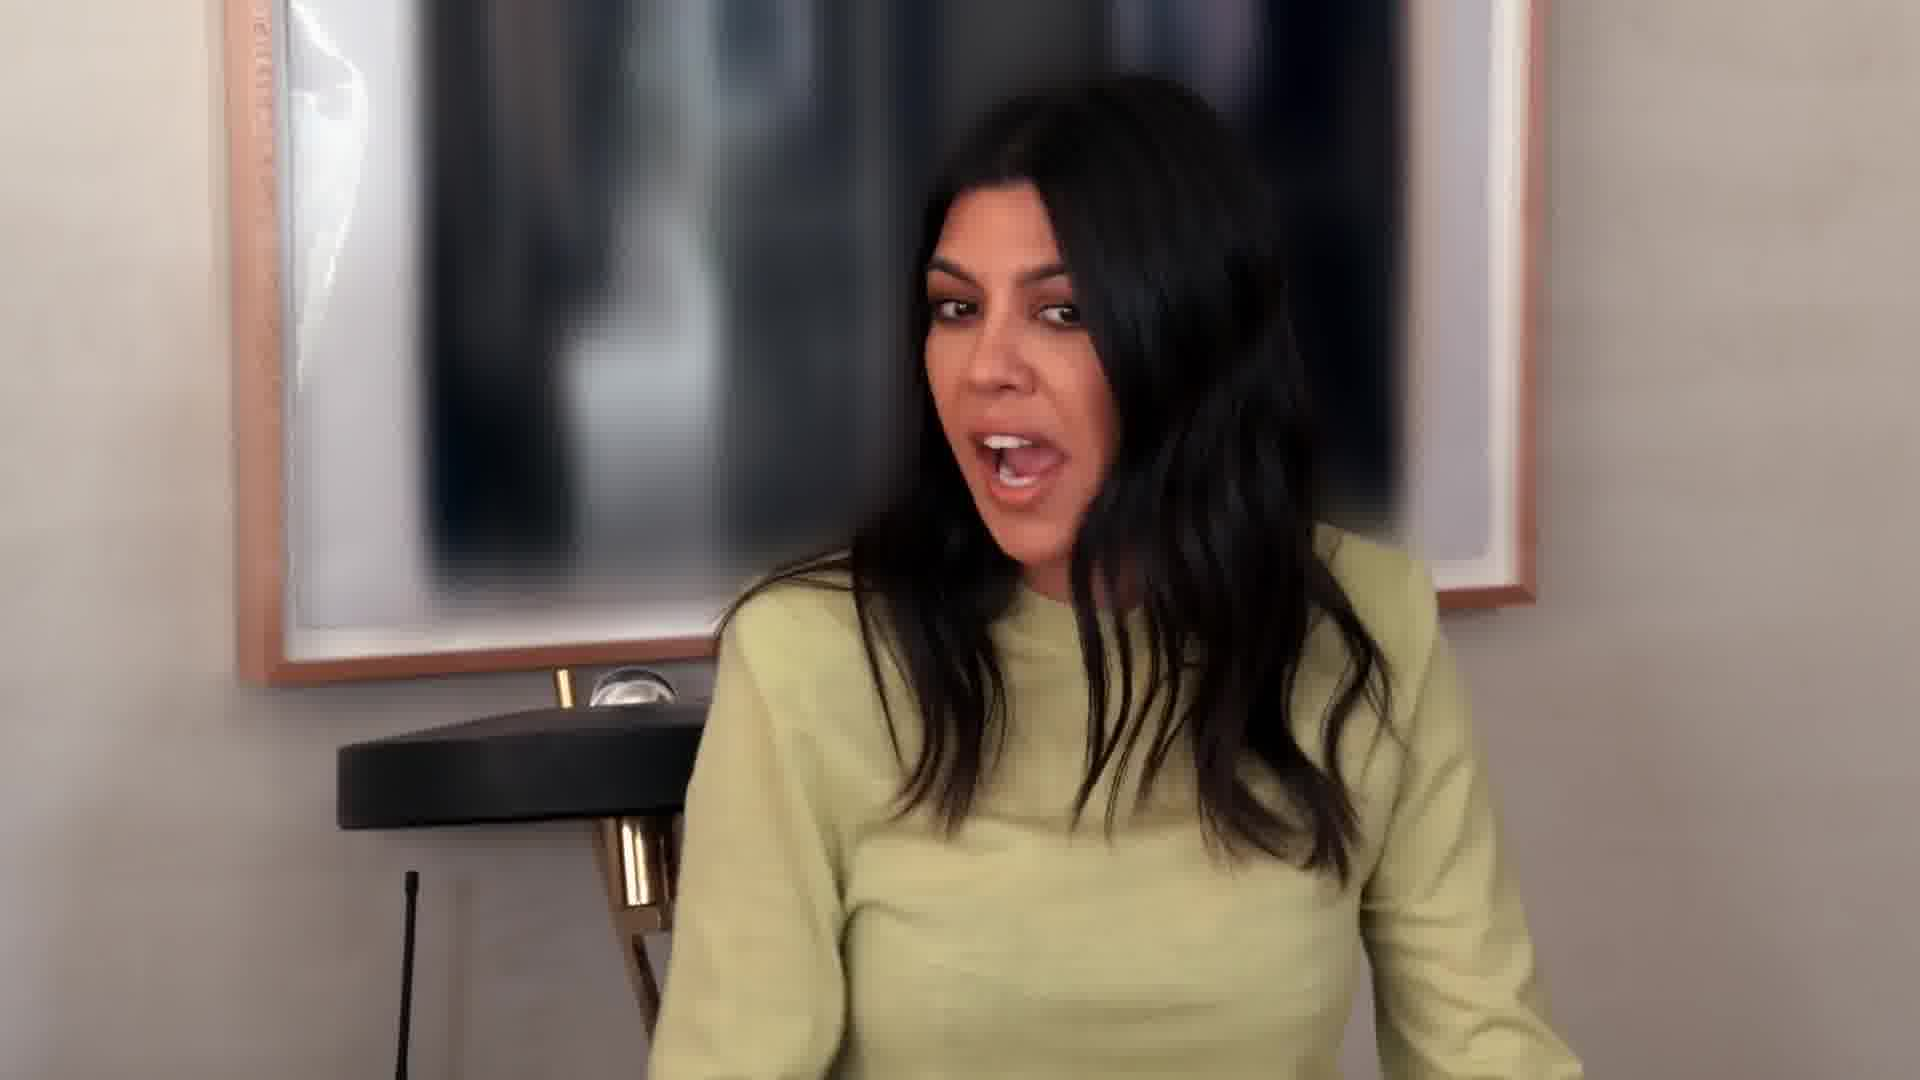

AU: AU12_r Emotion: Anger


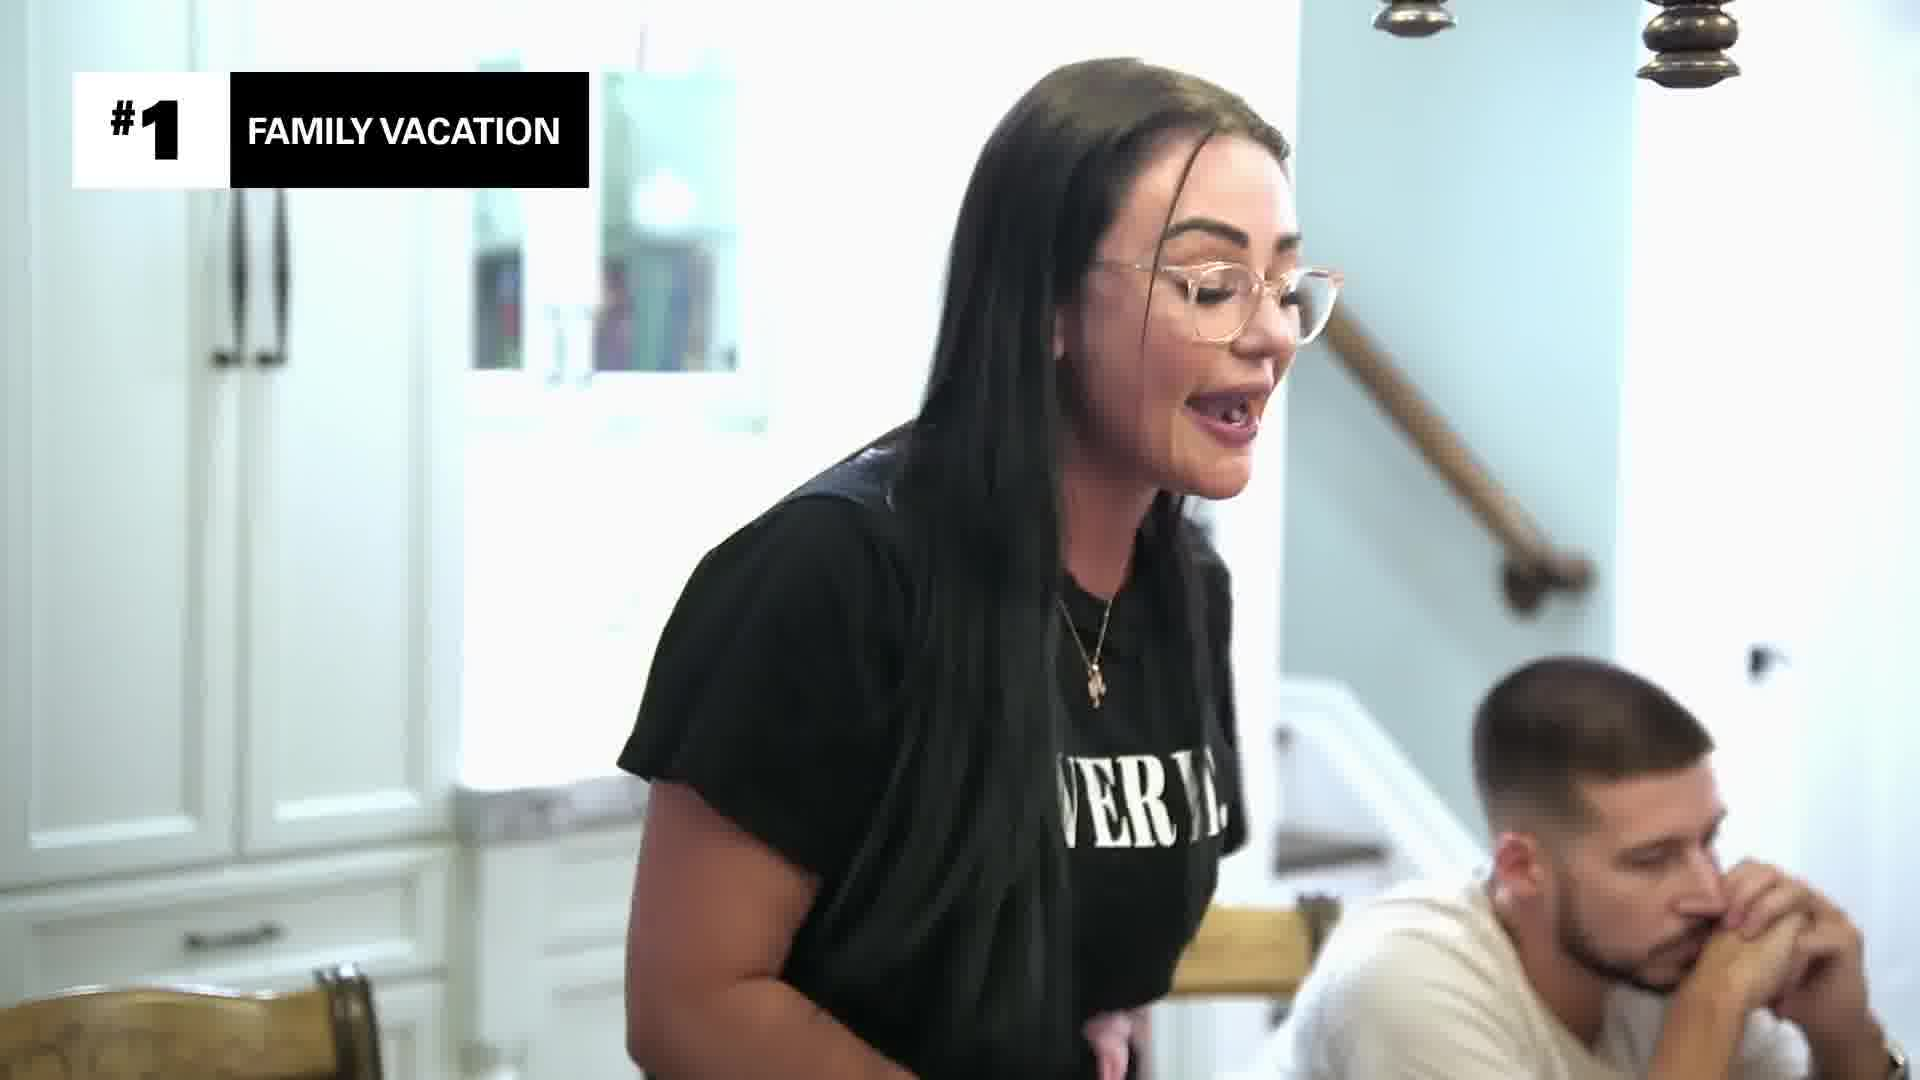

AU: AU17_r Emotion: Anger


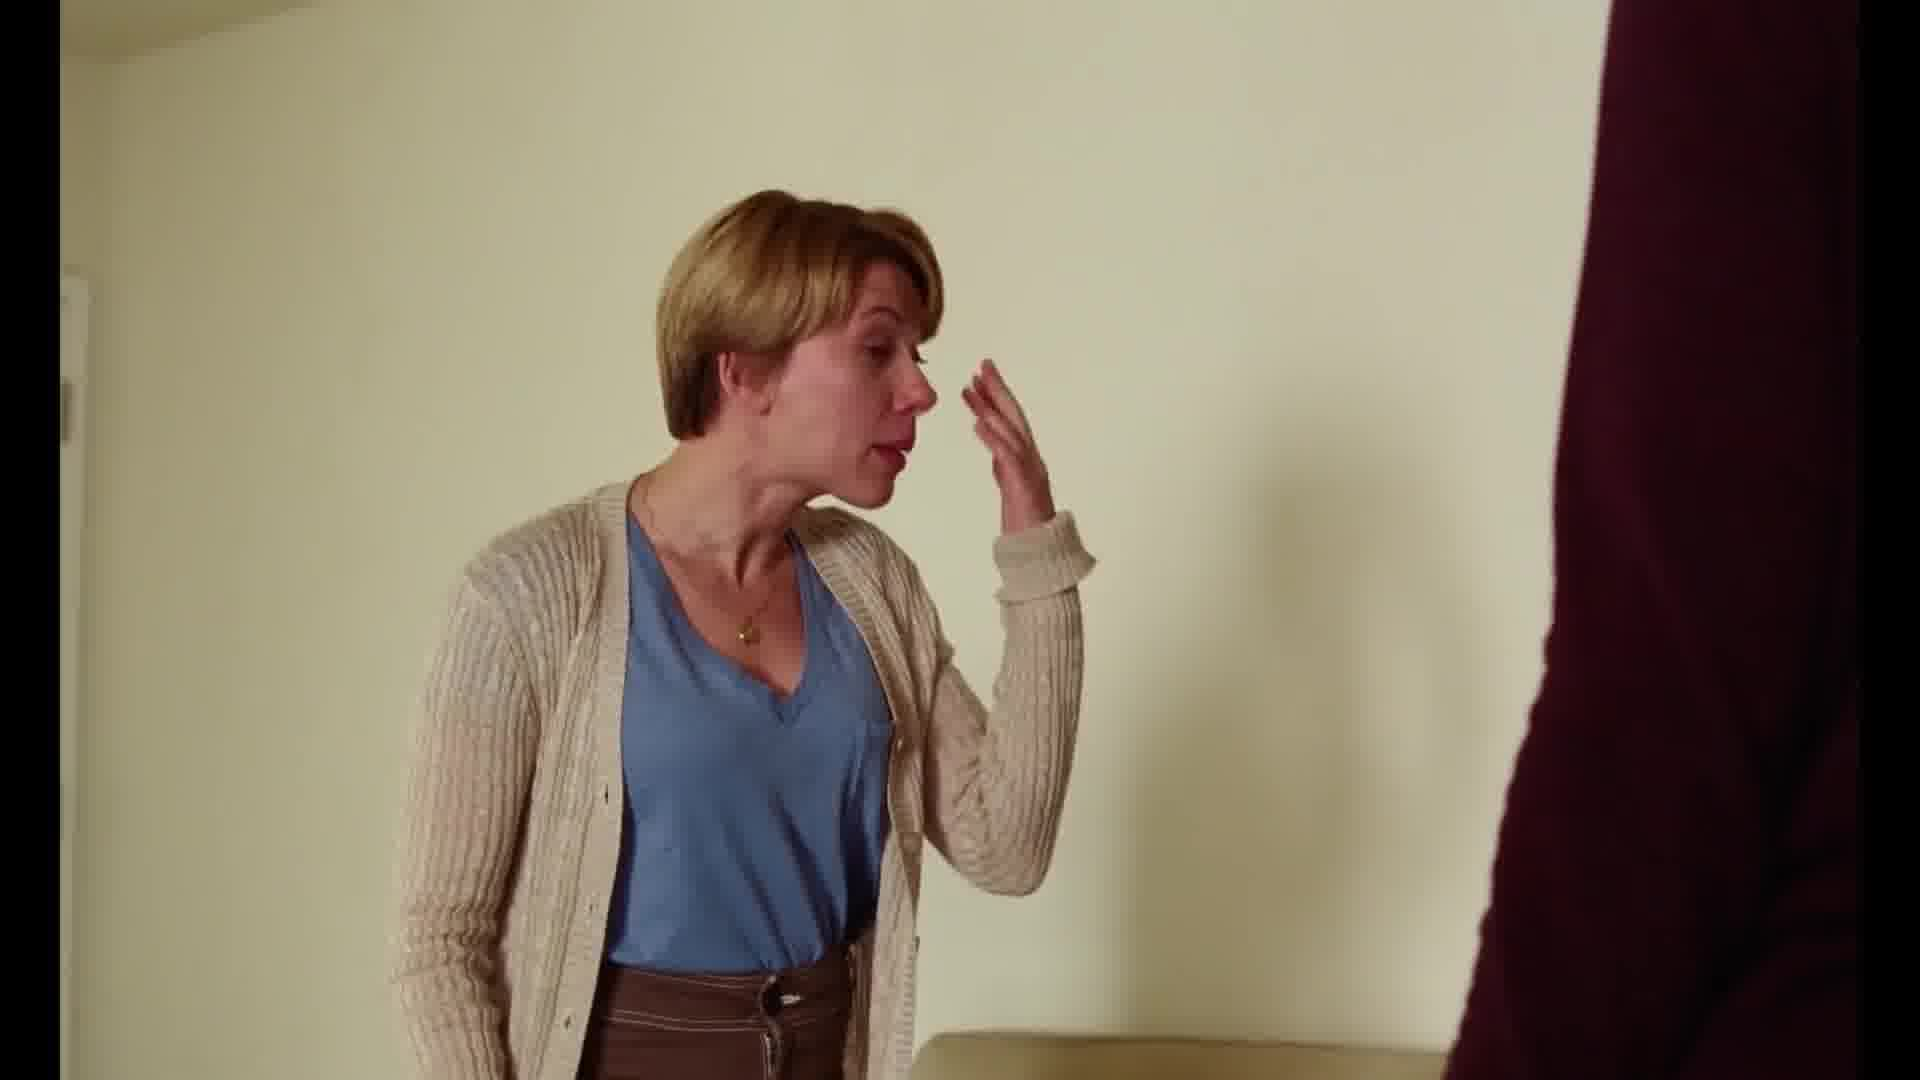

AU: AU23_r Emotion: Anger


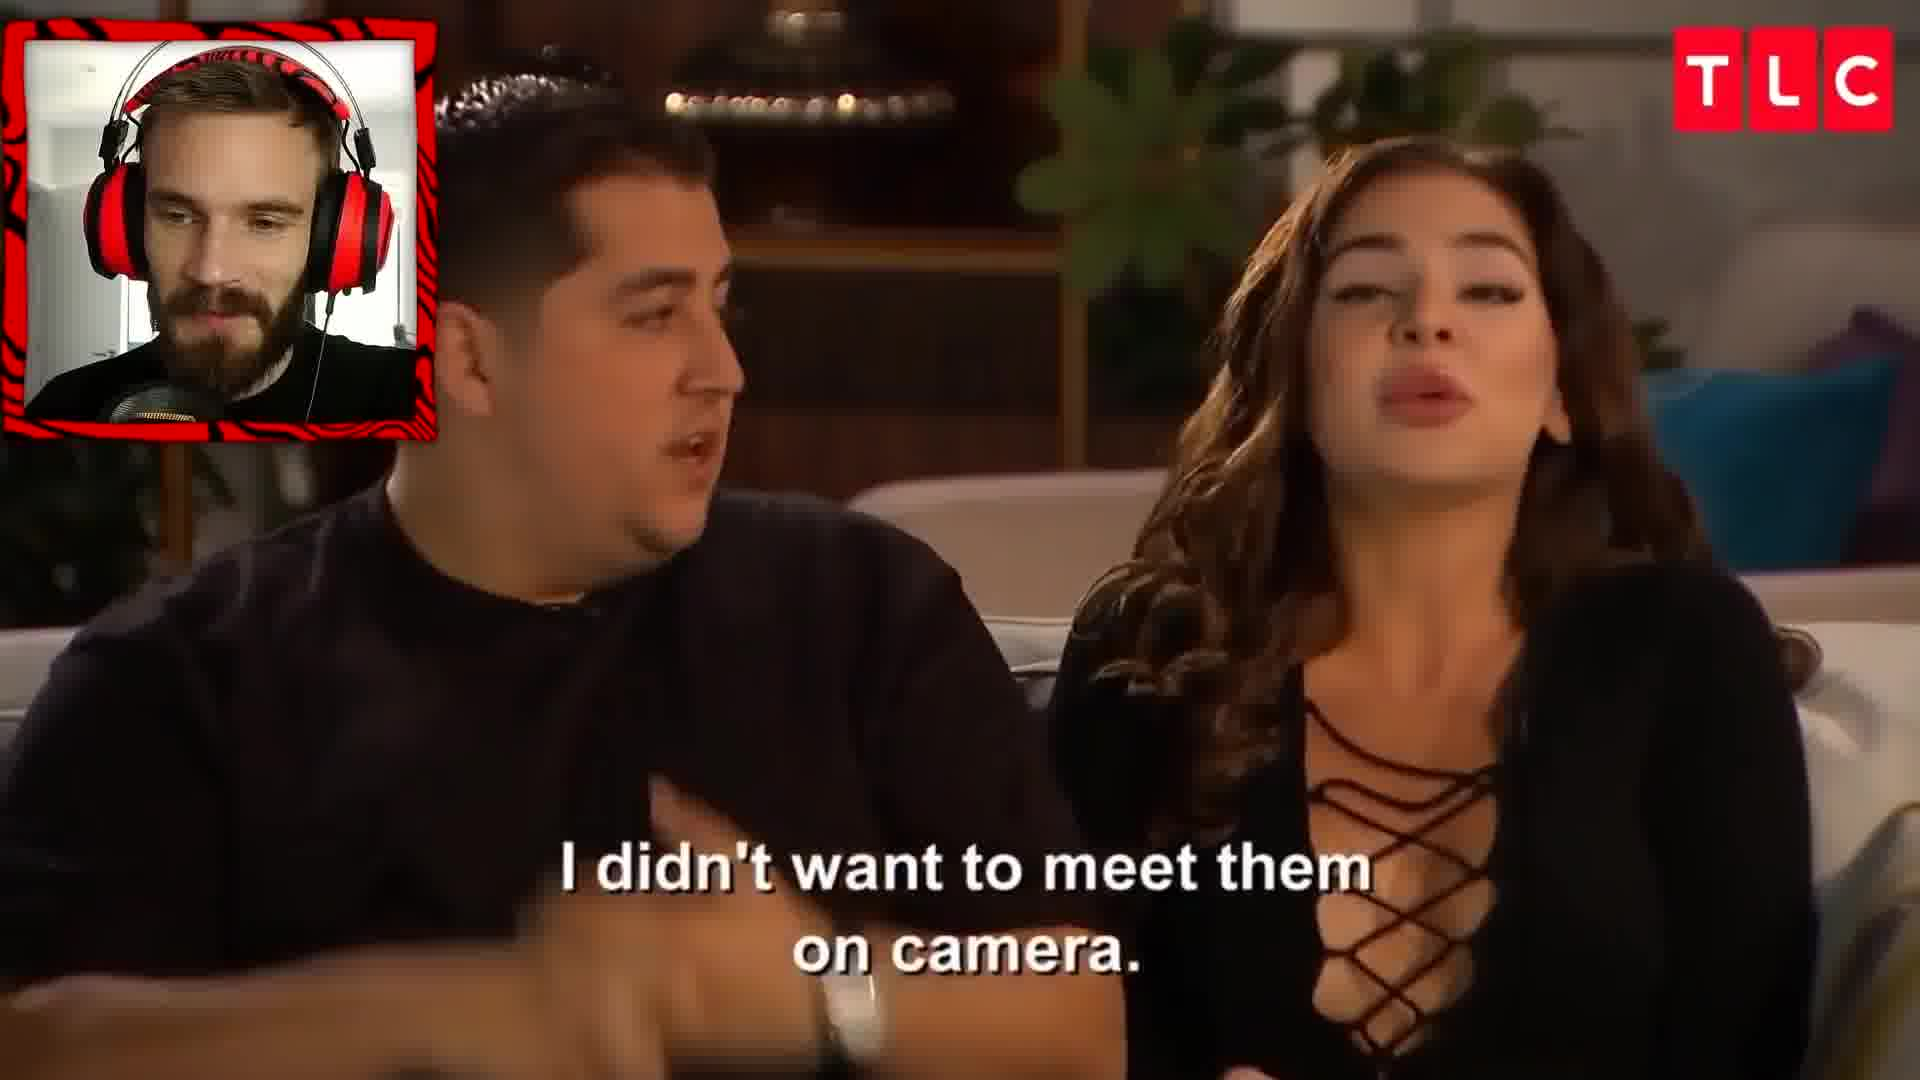

AU: AU26_r Emotion: Anger


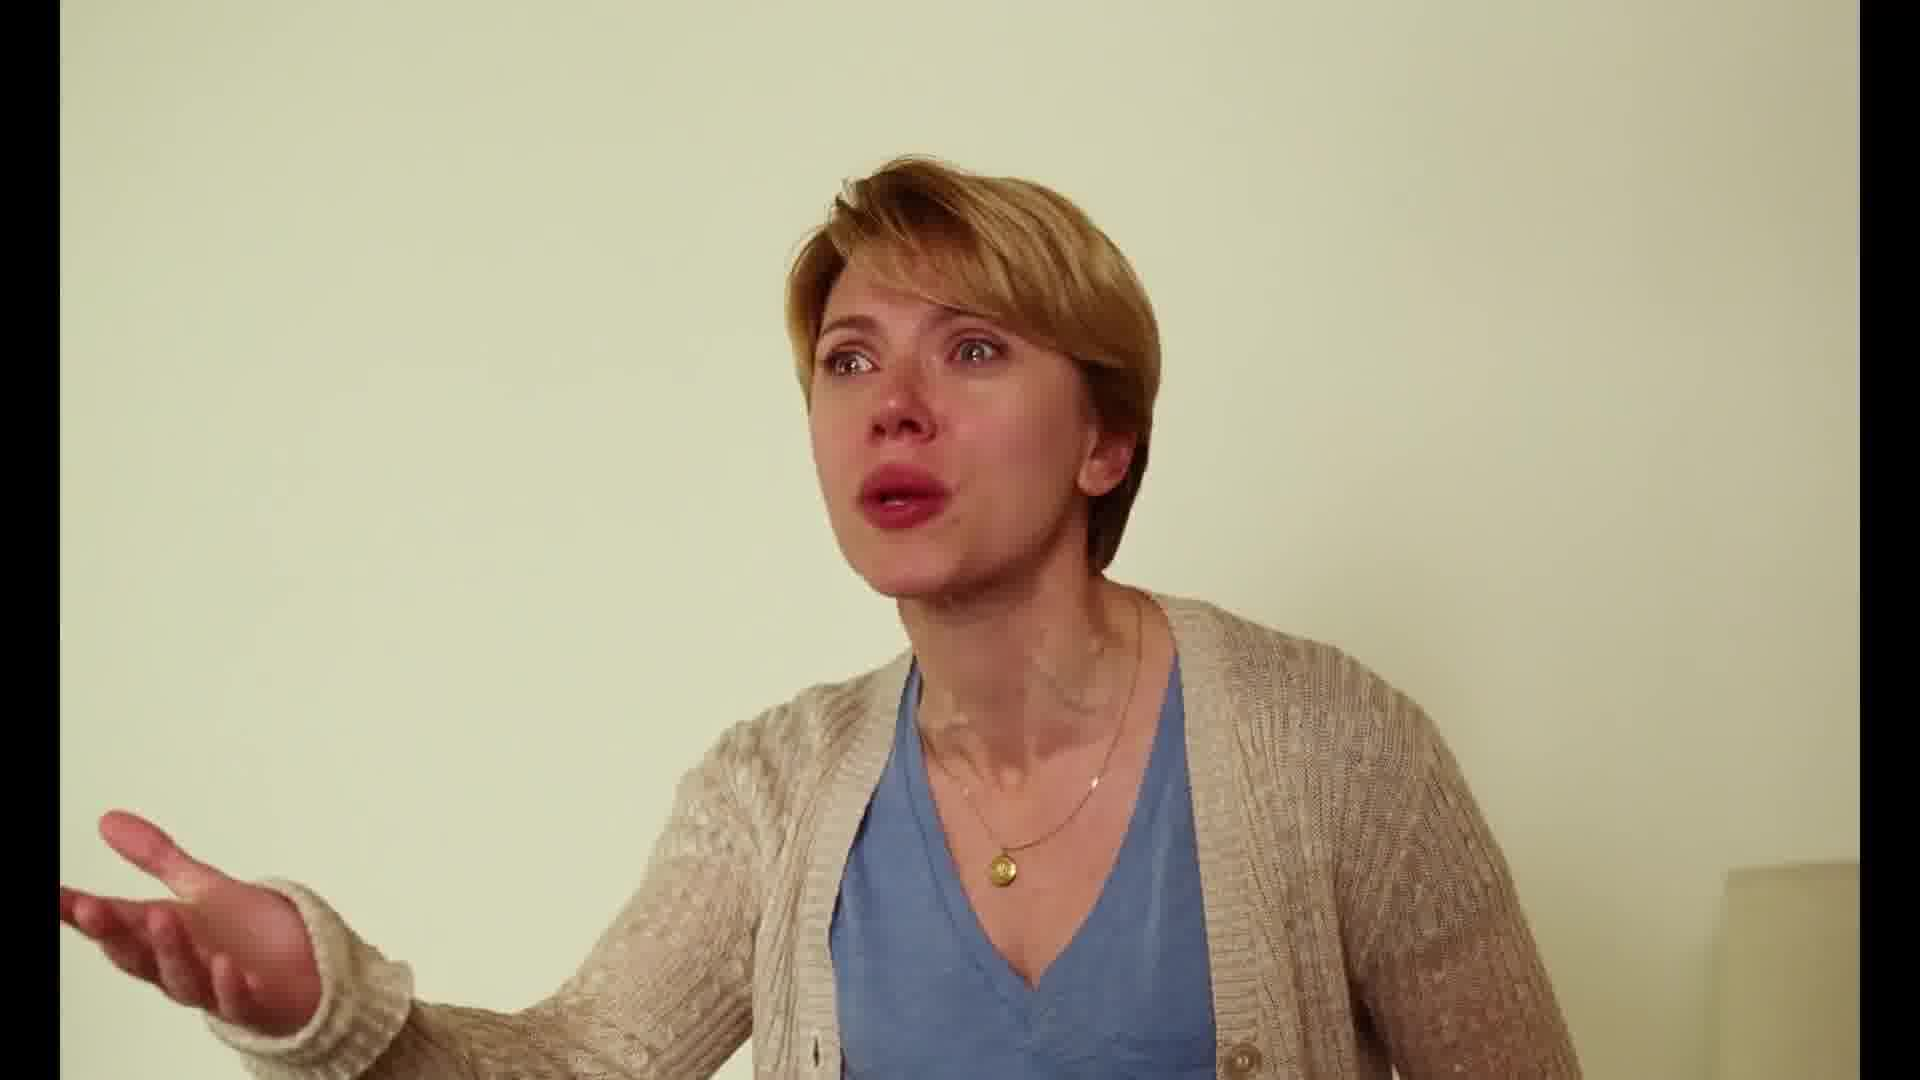

AU: AU45_r Emotion: Disgust


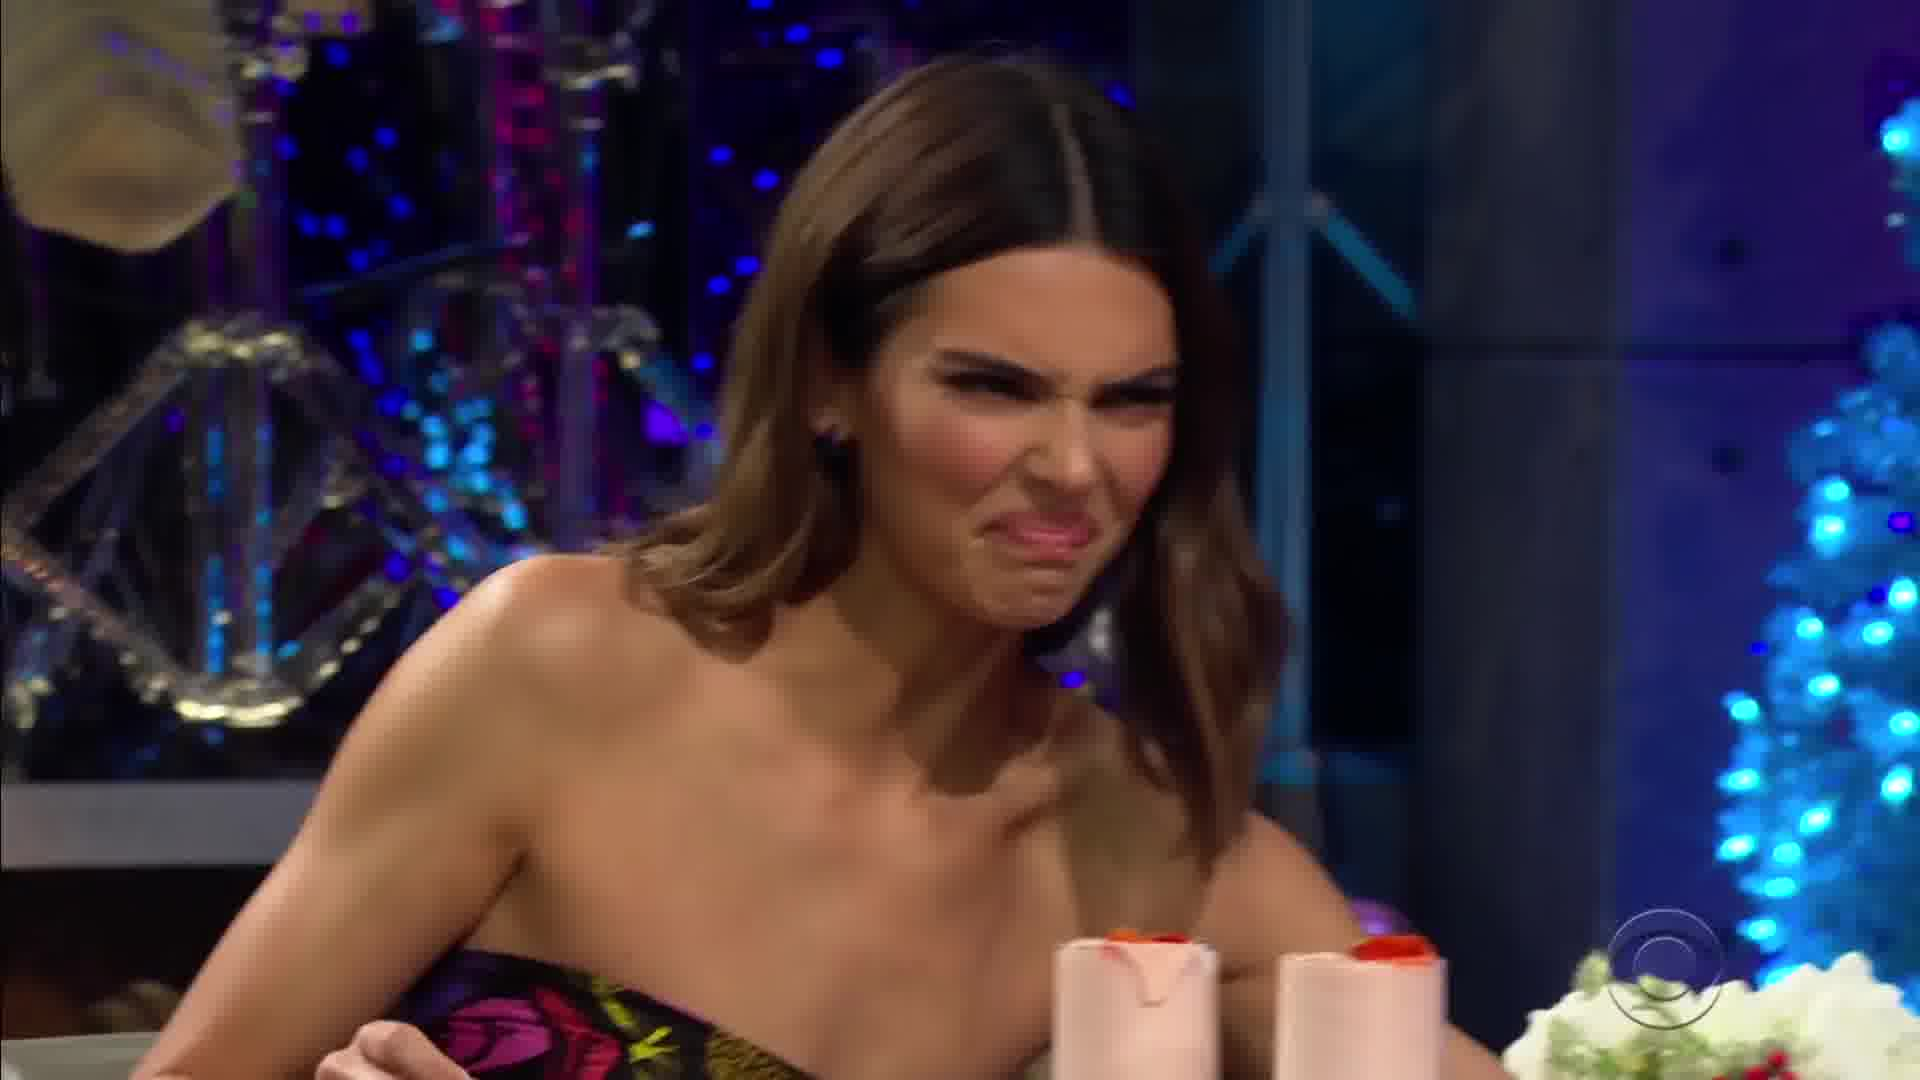

Persia: 

AU: AU01_r


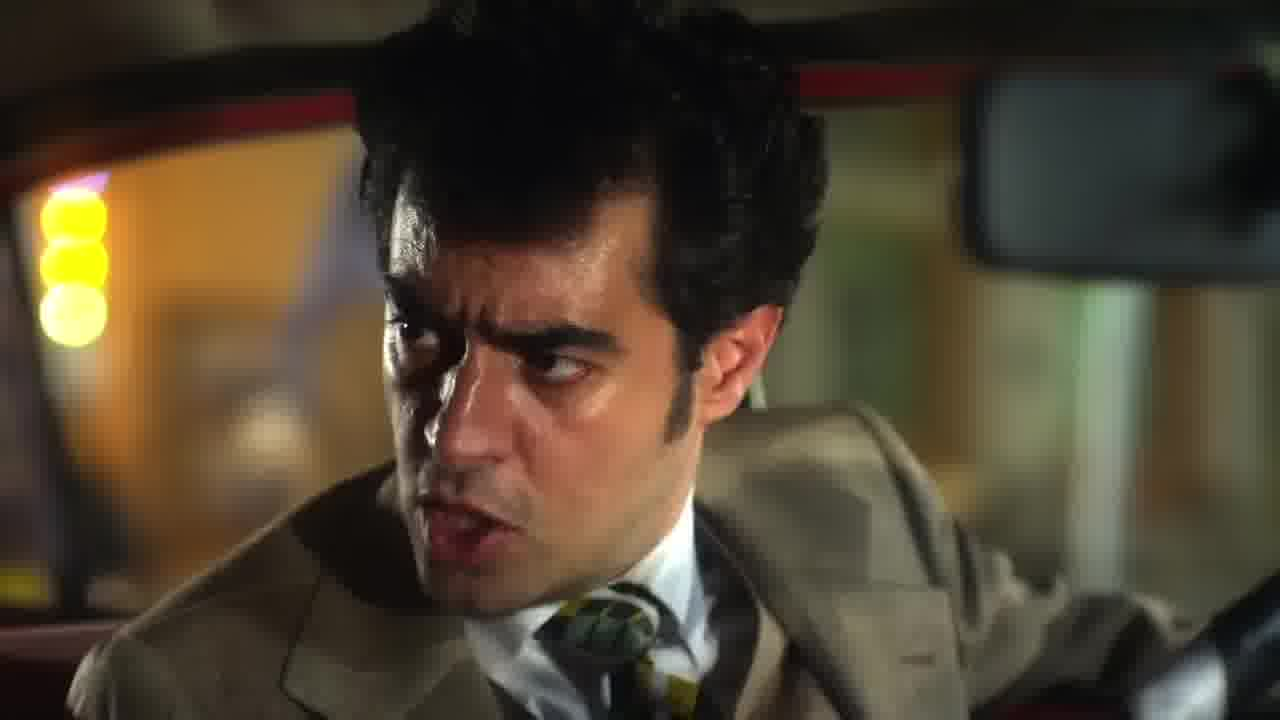

AU: AU02_rEmotion: Contempt


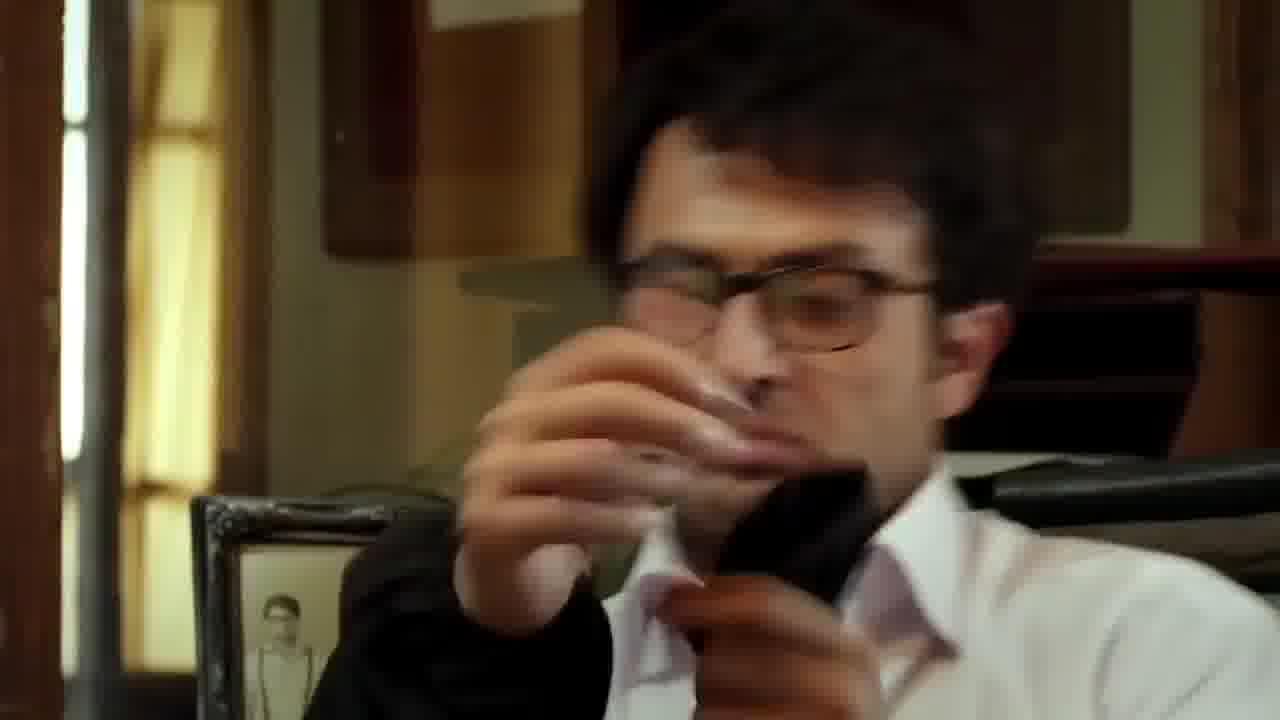

AU: AU04_r


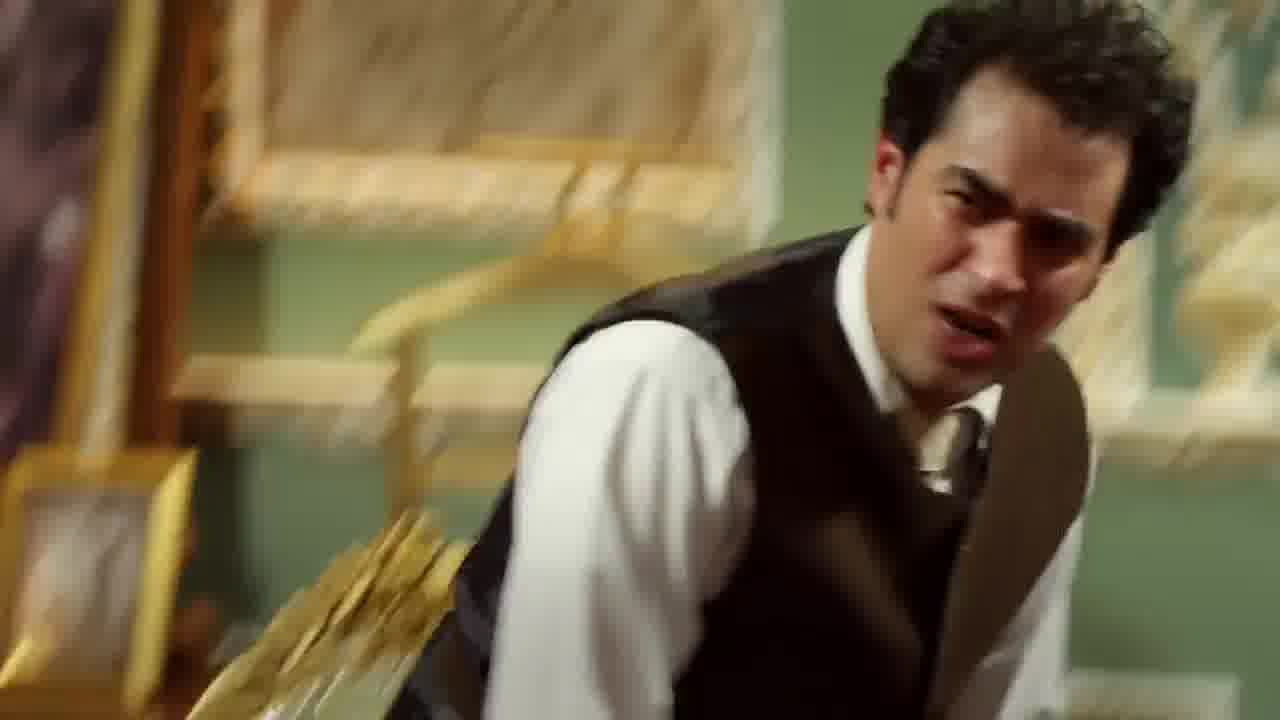

AU: AU05_rEmotion: Contempt


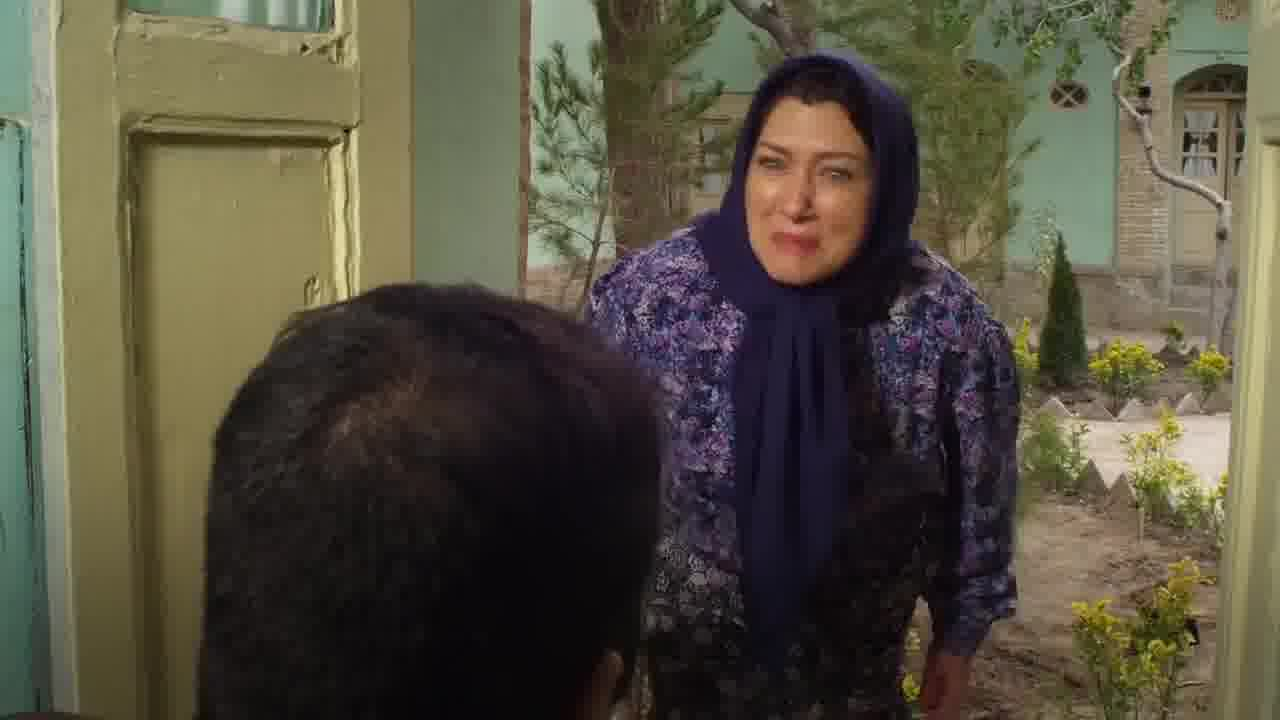

AU: AU06_r Emotion: Disgust


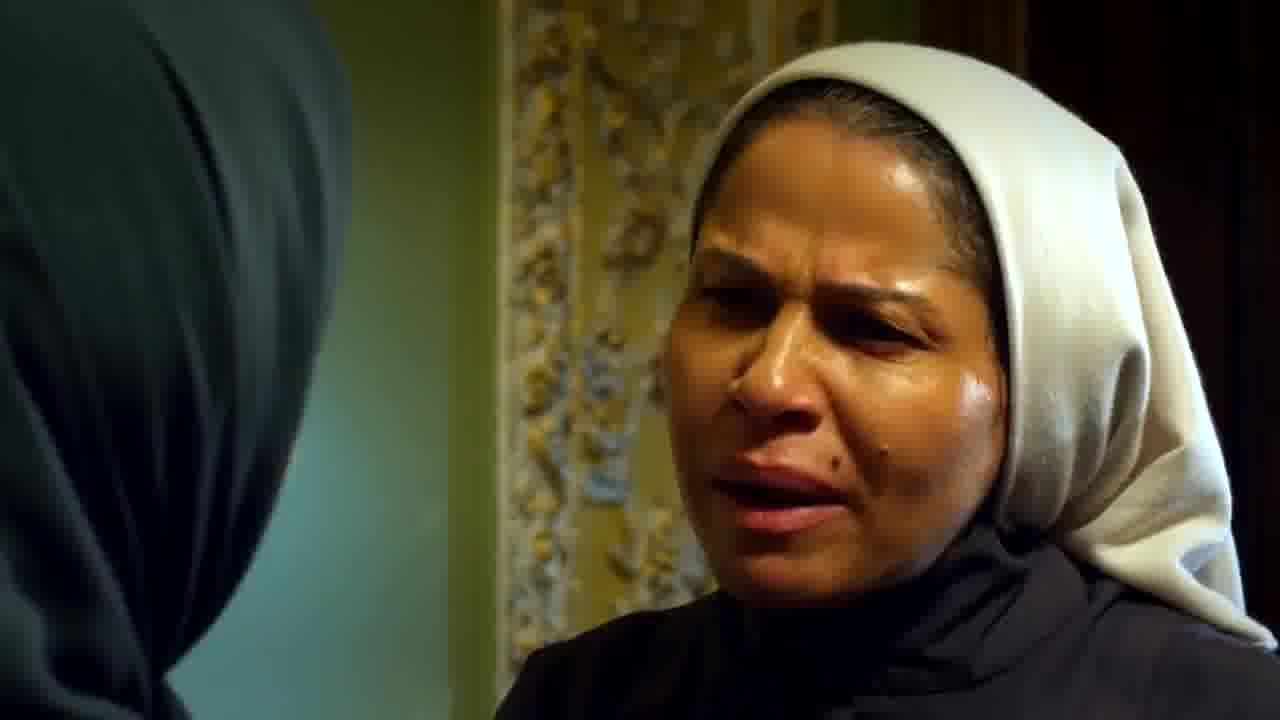

AU: AU07_r


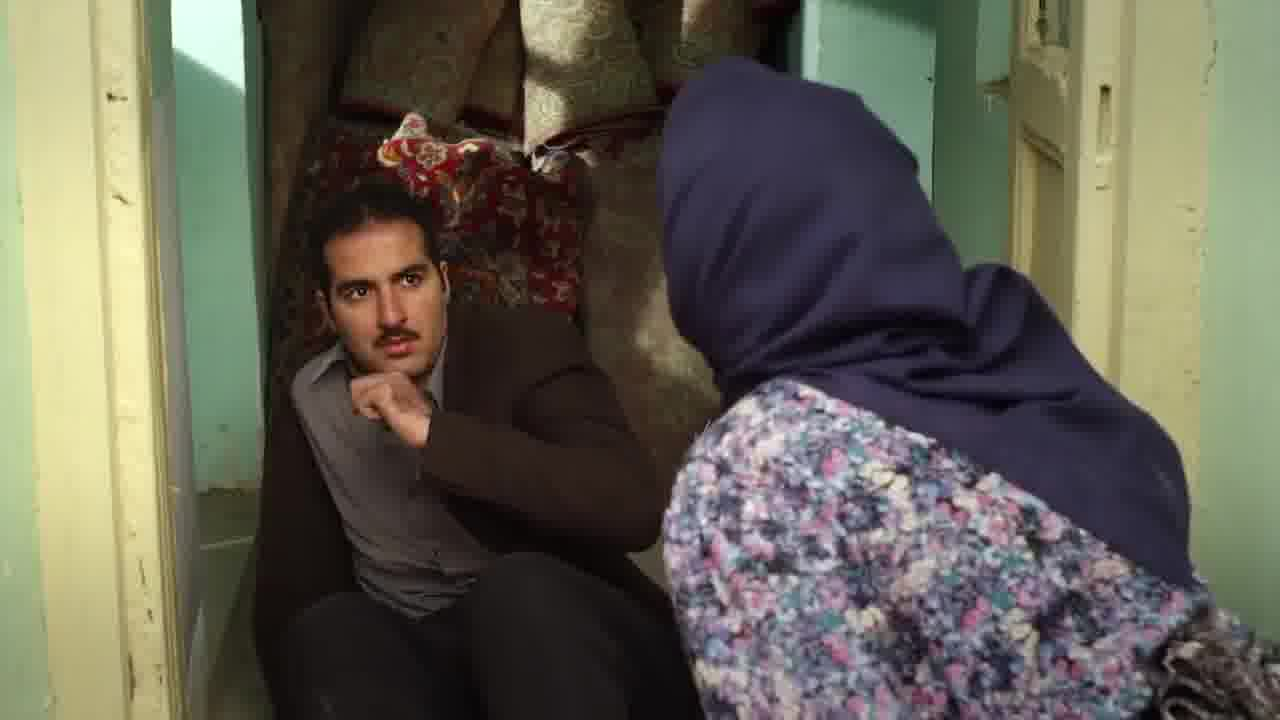

AU: AU09_r


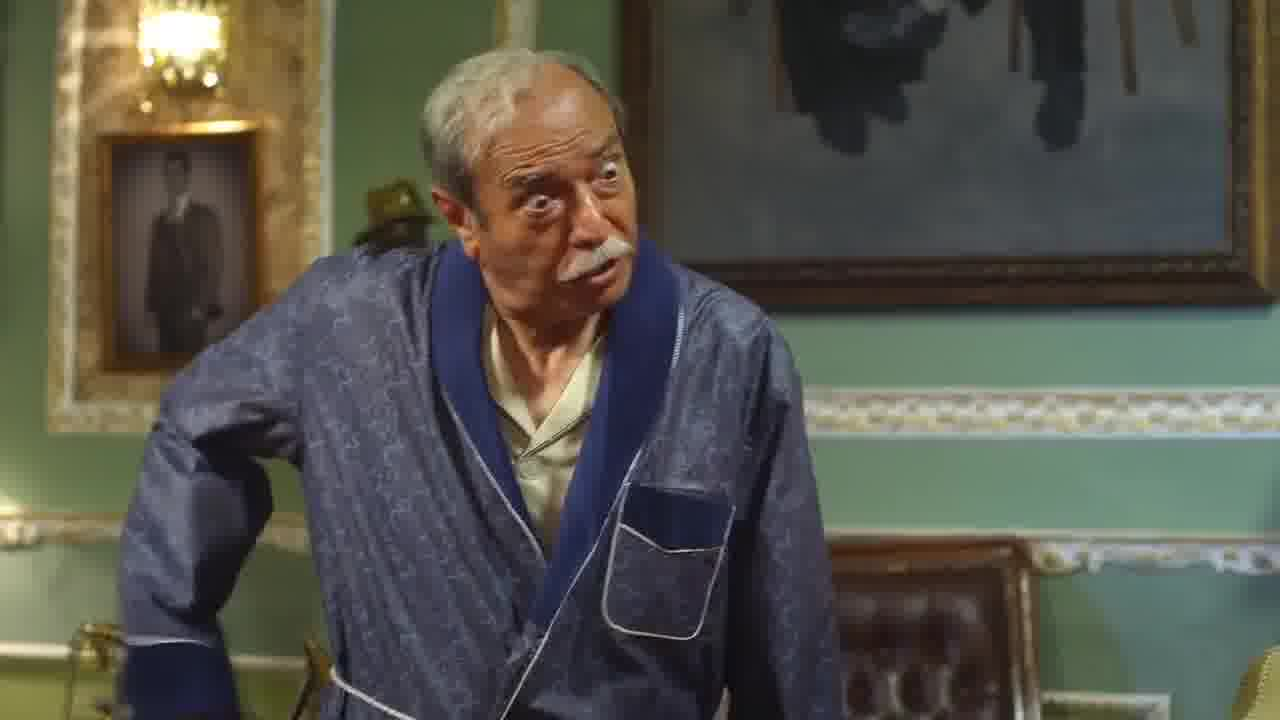

AU: AU10_r


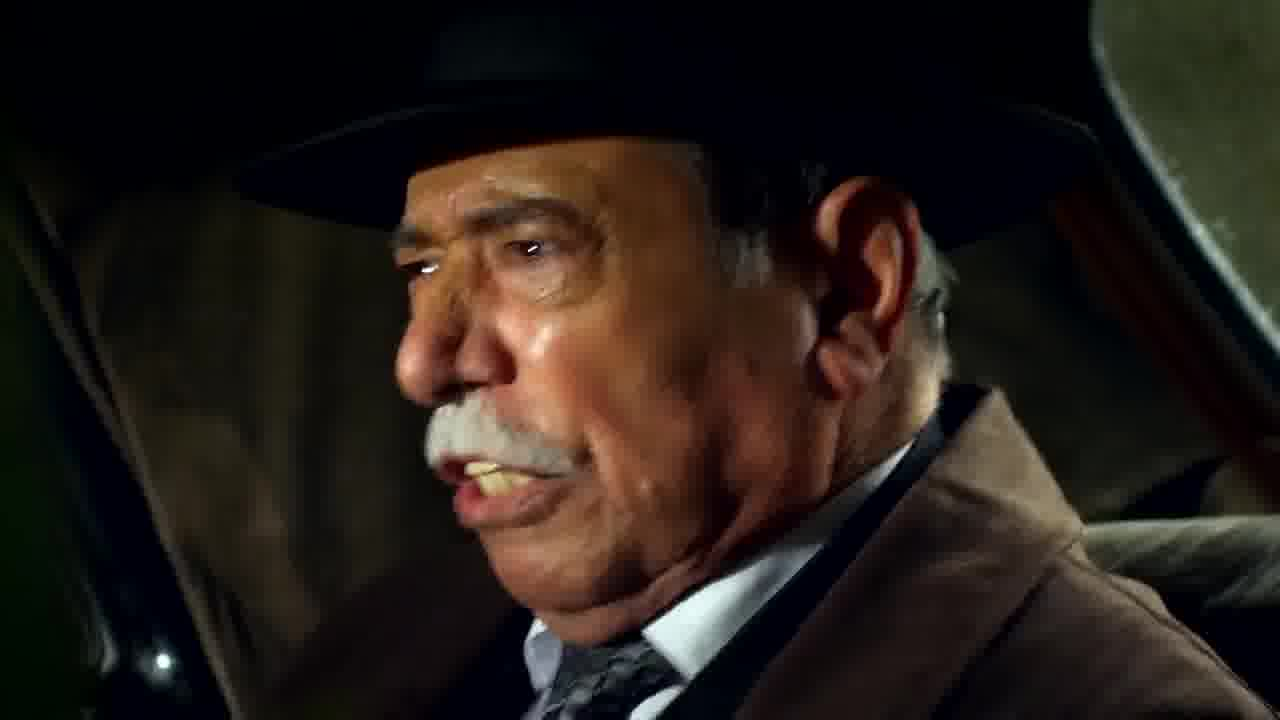

AU: AU12_r Emotion: Disgust


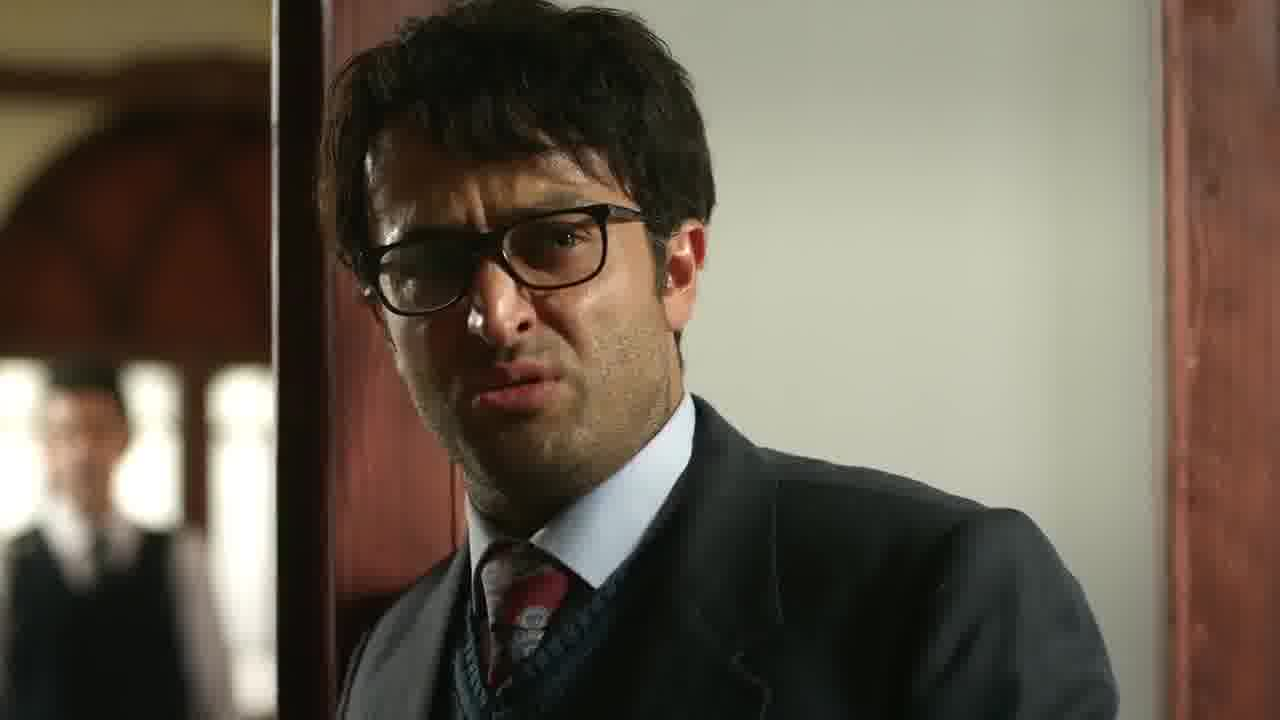

AU: AU14_r


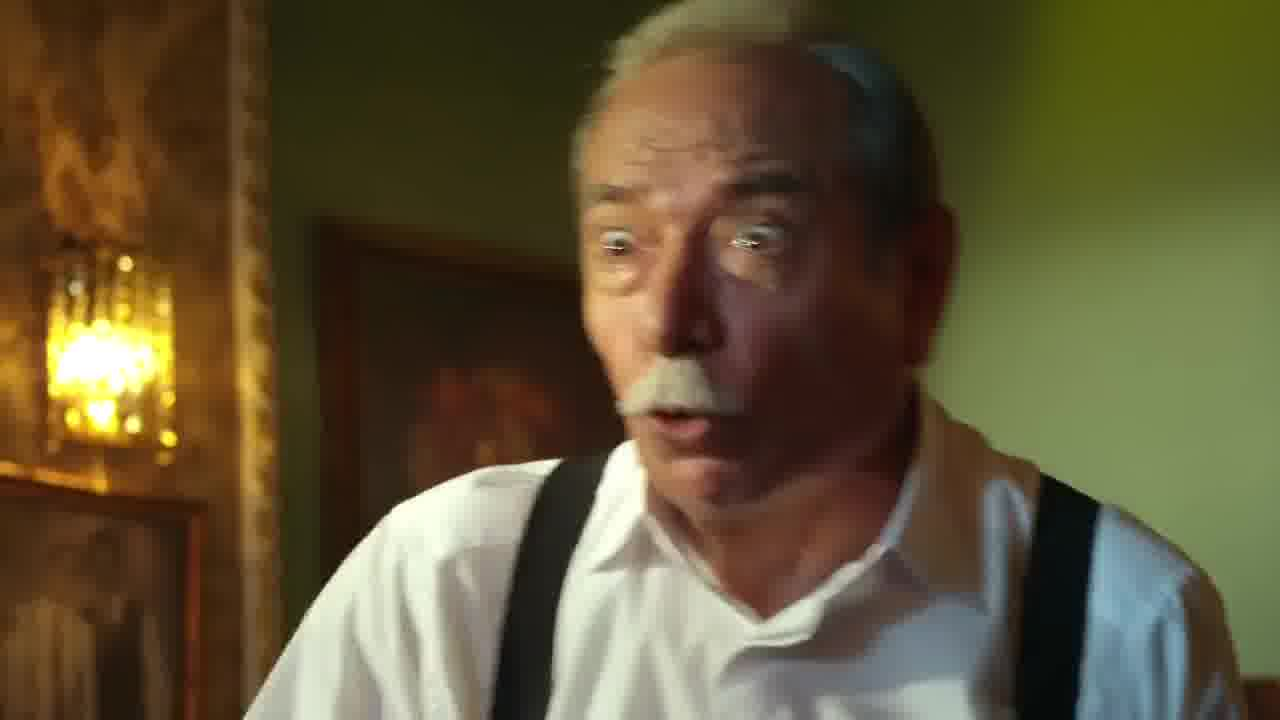

AU: AU15_rEmotion: Contempt


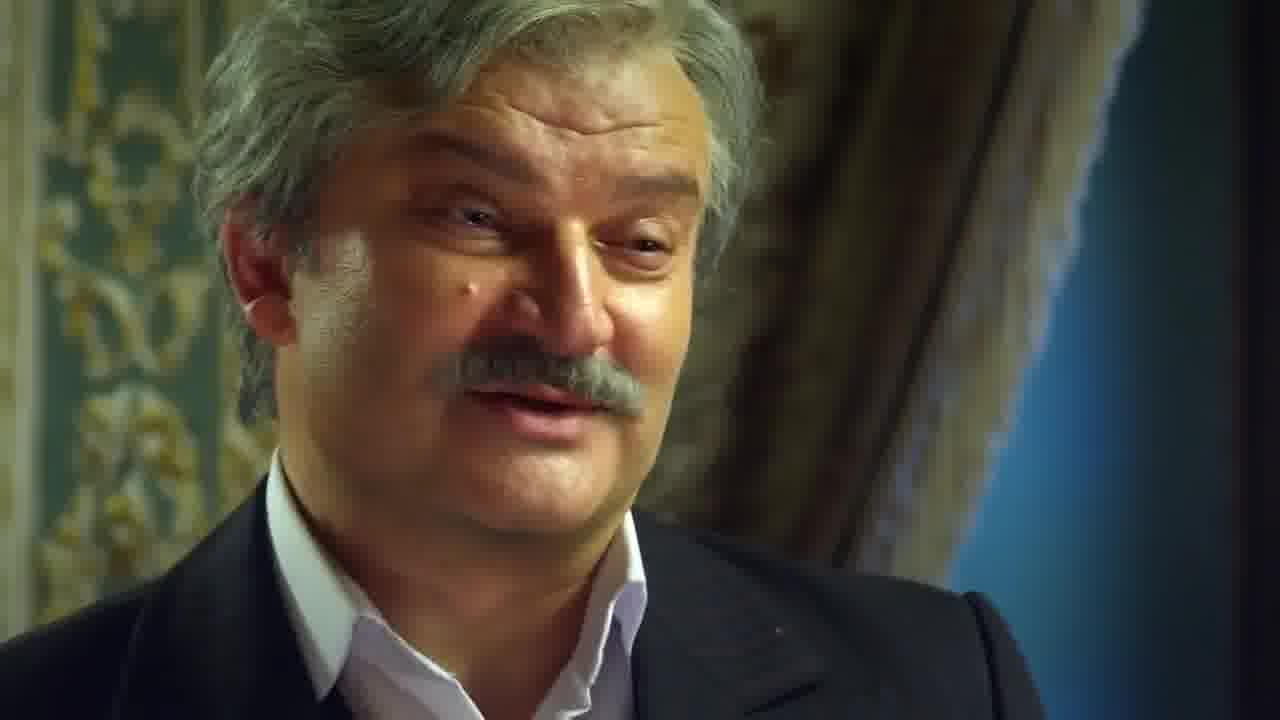

AU: AU17_rEmotion: Contempt


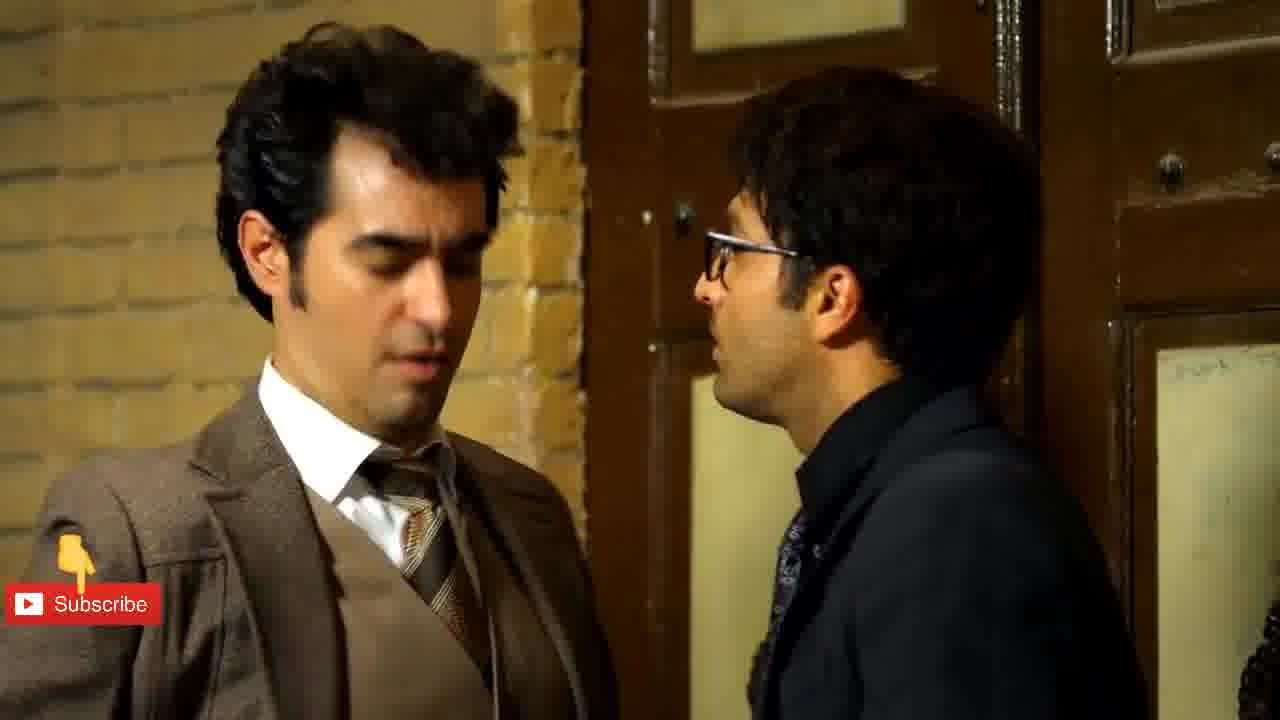

AU: AU23_rEmotion: Contempt


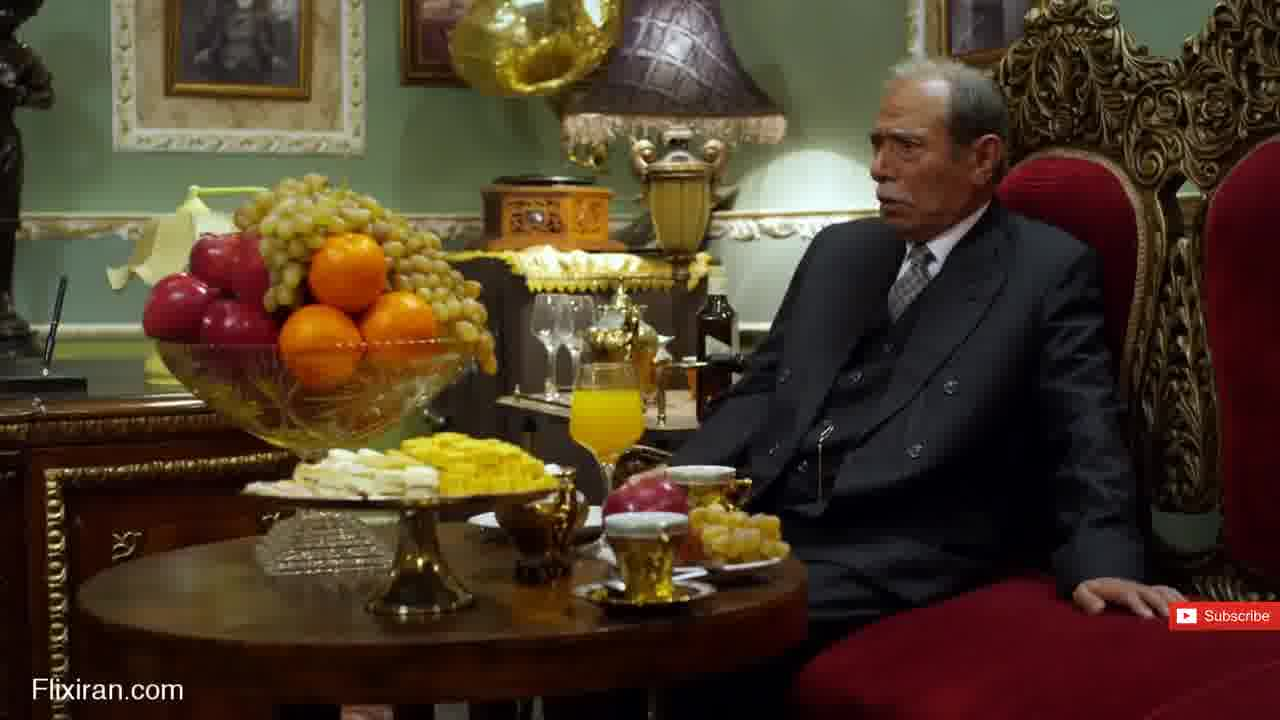

AU: AU25_rEmotion: Contempt


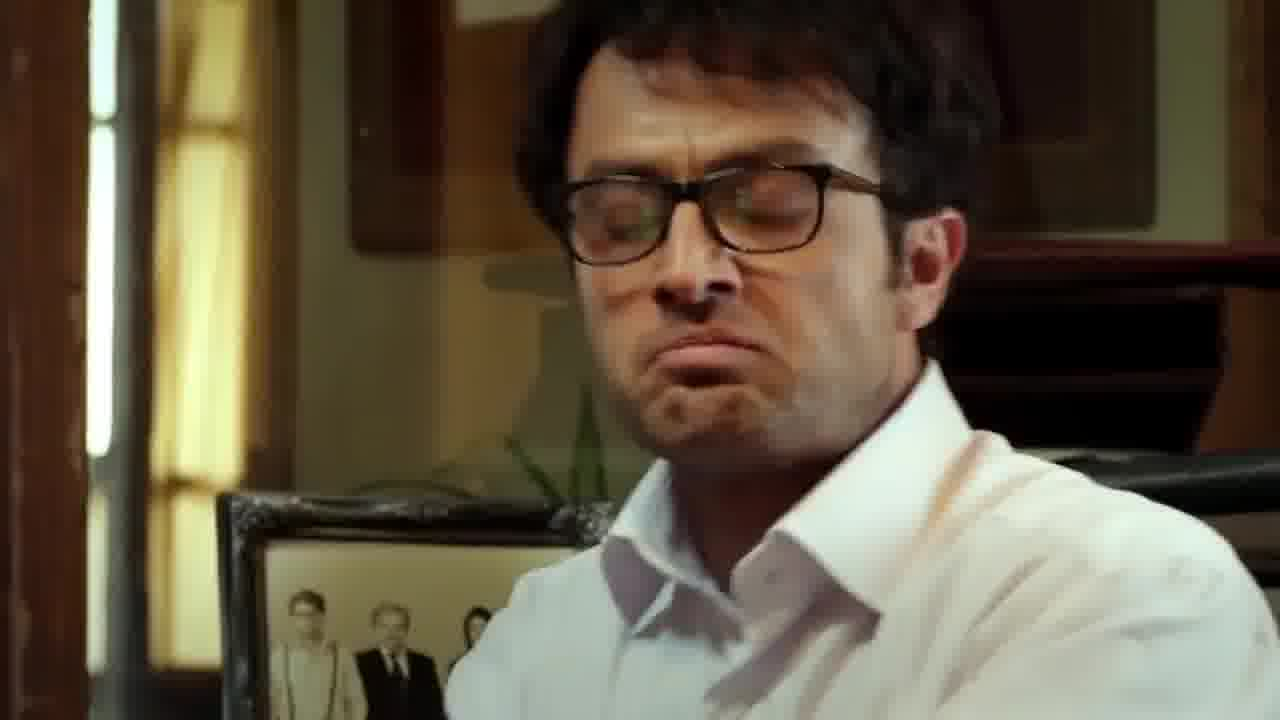

AU: AU26_rEmotion: Contempt


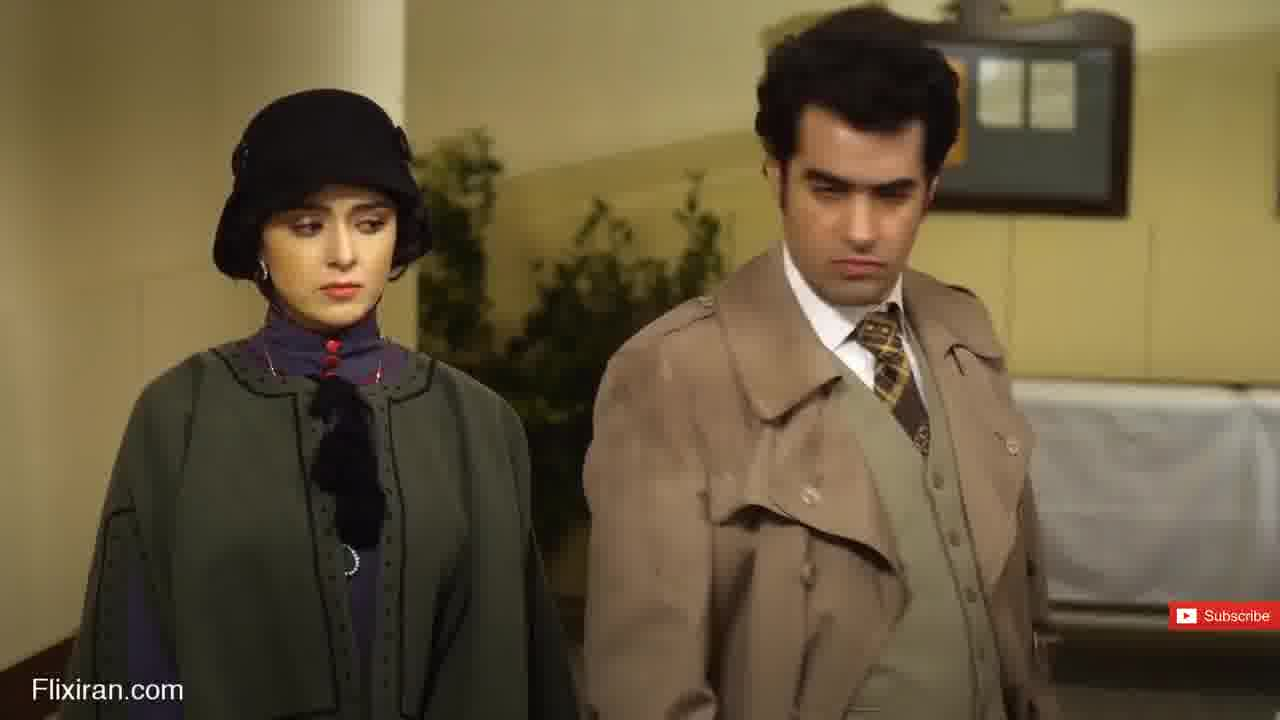

AU: AU45_r Emotion: Disgust


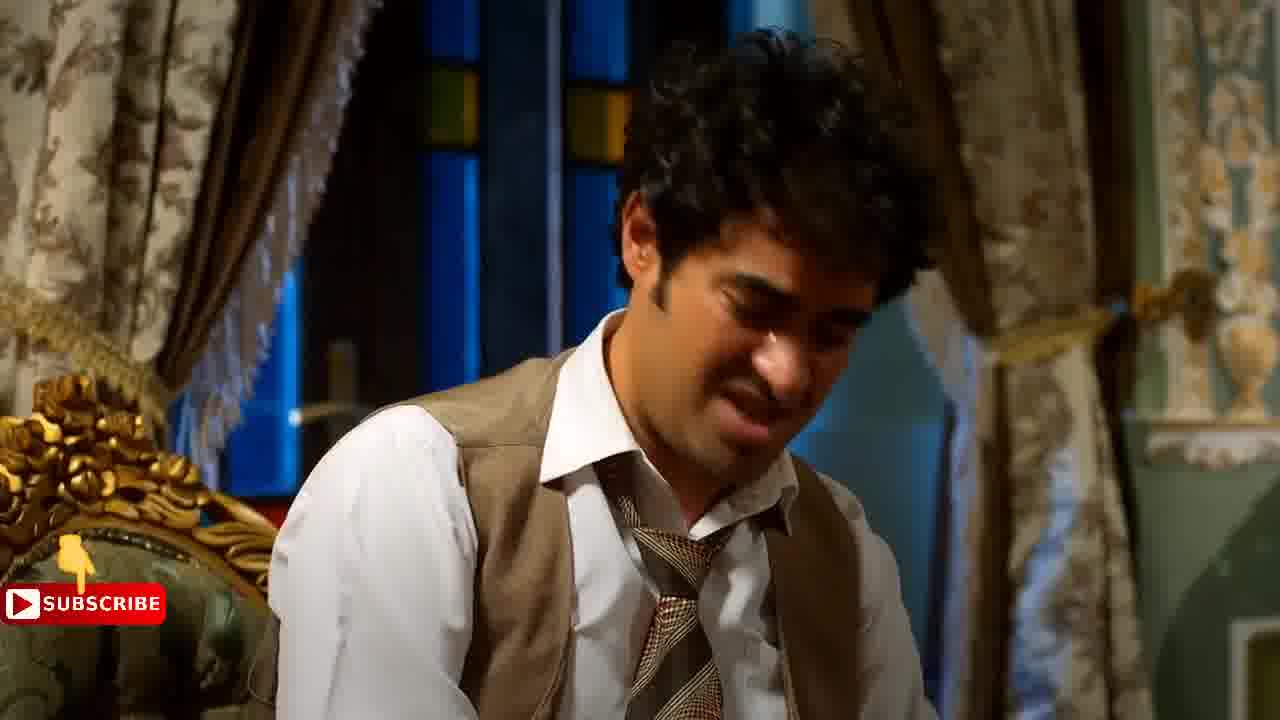

Philippines: 

AU: AU01_r Emotion: Contempt


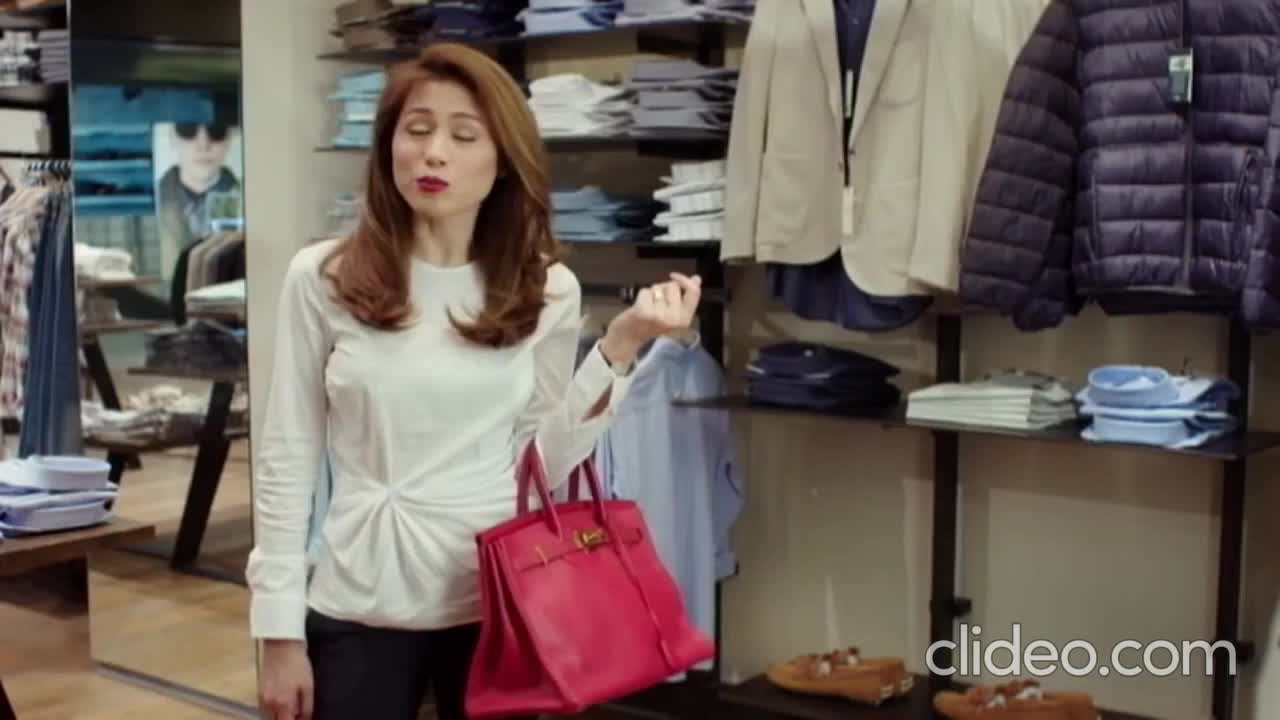

AU: AU02_r Emotion: Contempt


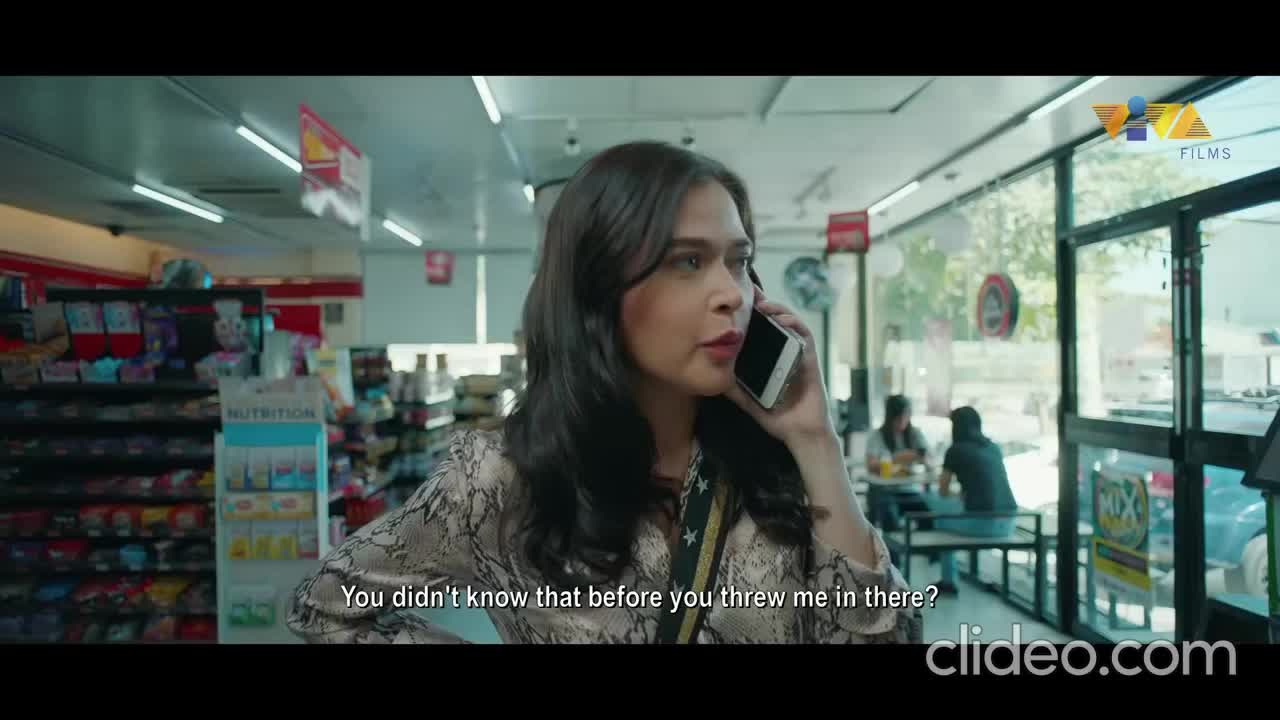

AU: AU04_r Emotion: Contempt


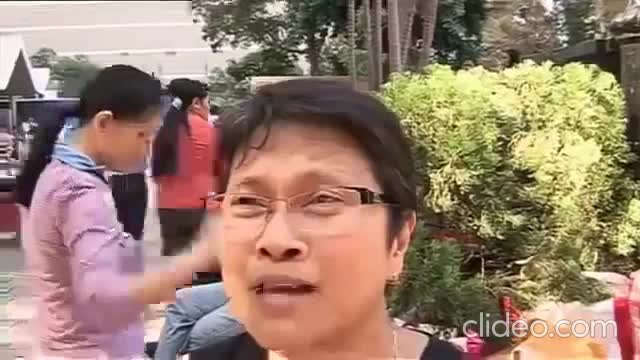

AU: AU05_r Emotion: Anger


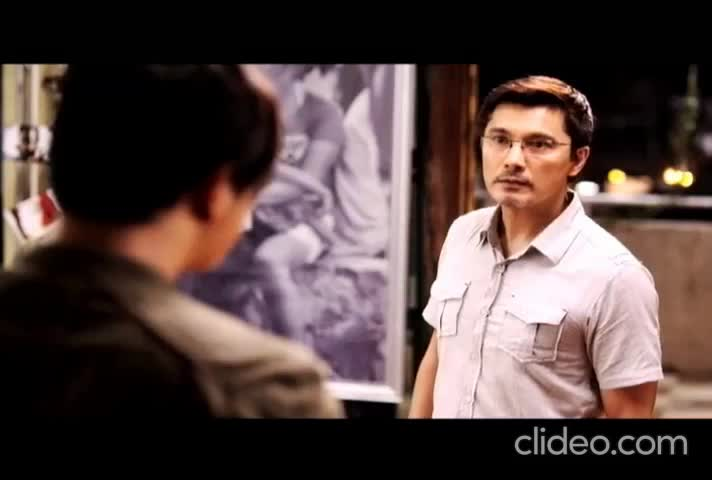

AU: AU06_r Emotion: Contempt


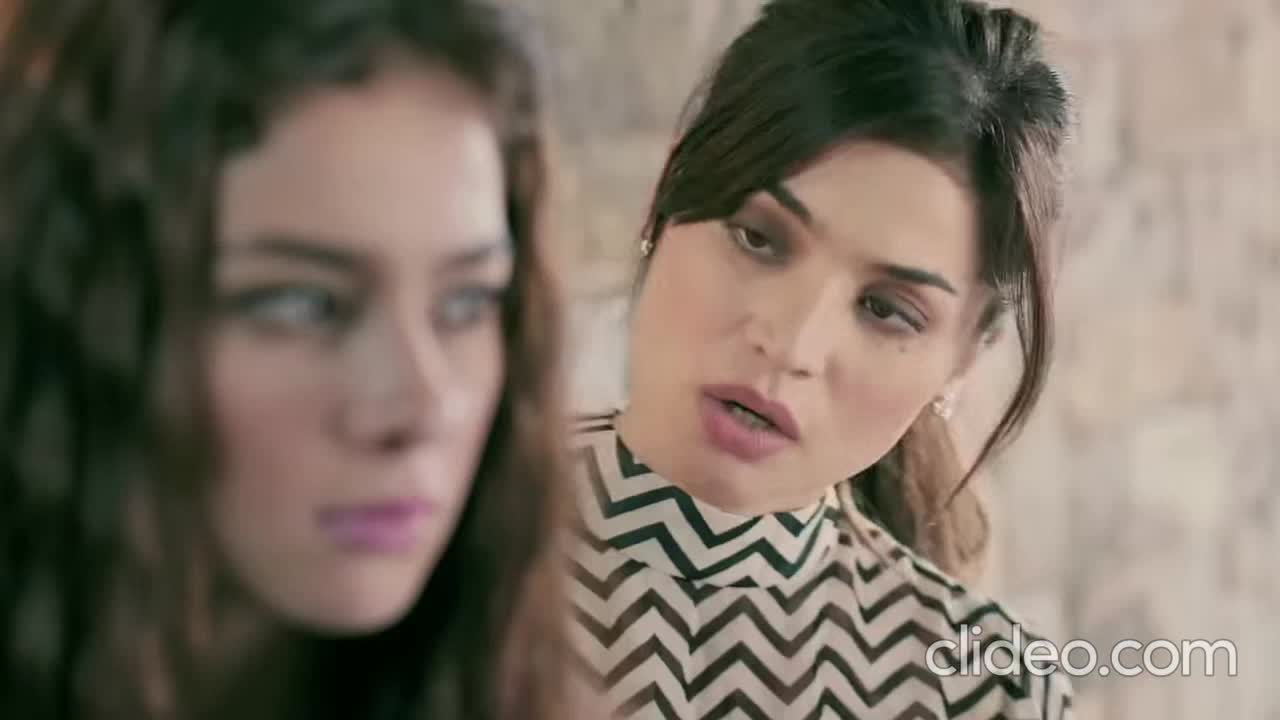

AU: AU07_r Emotion: Anger


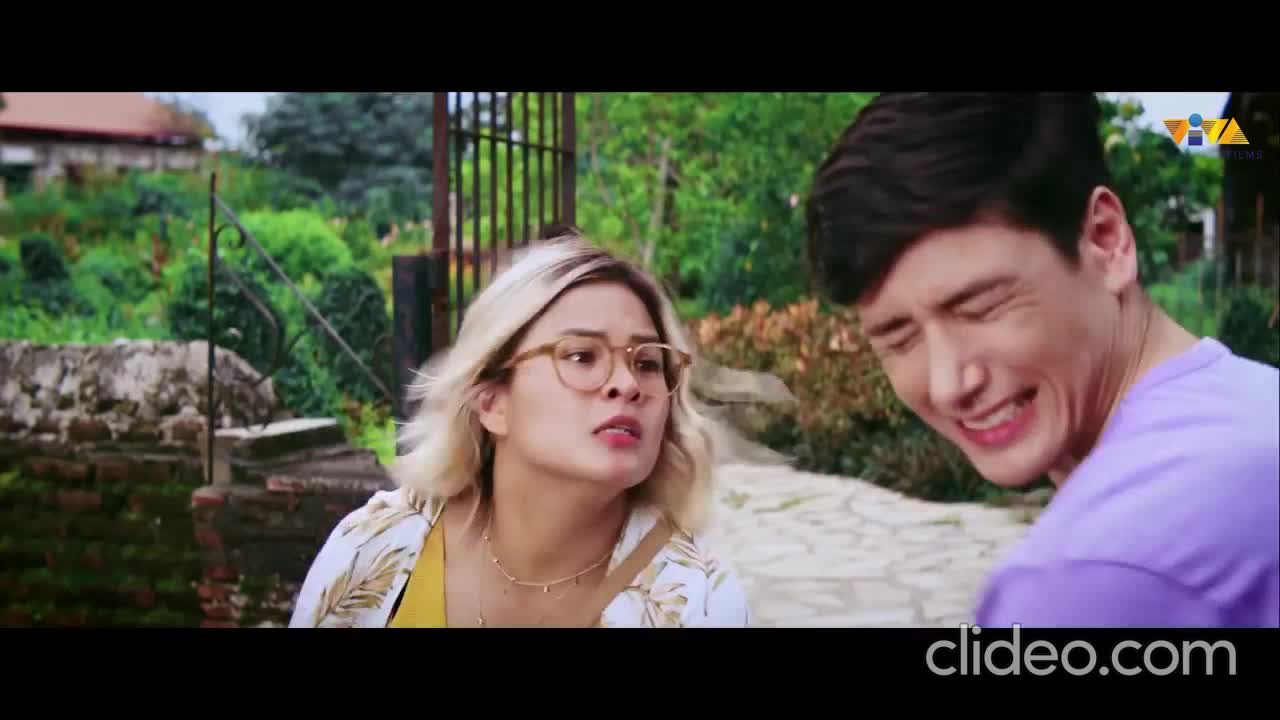

AU: AU09_r Emotion: Anger


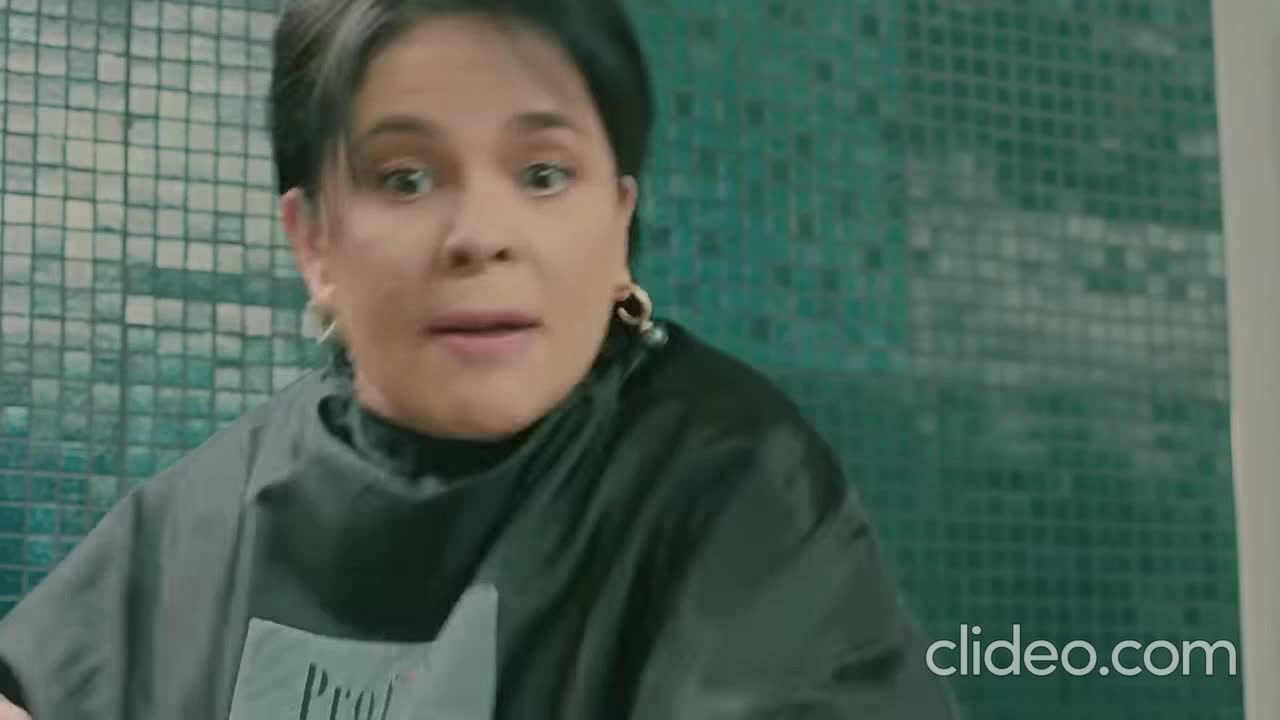

AU: AU10_r Emotion: Anger


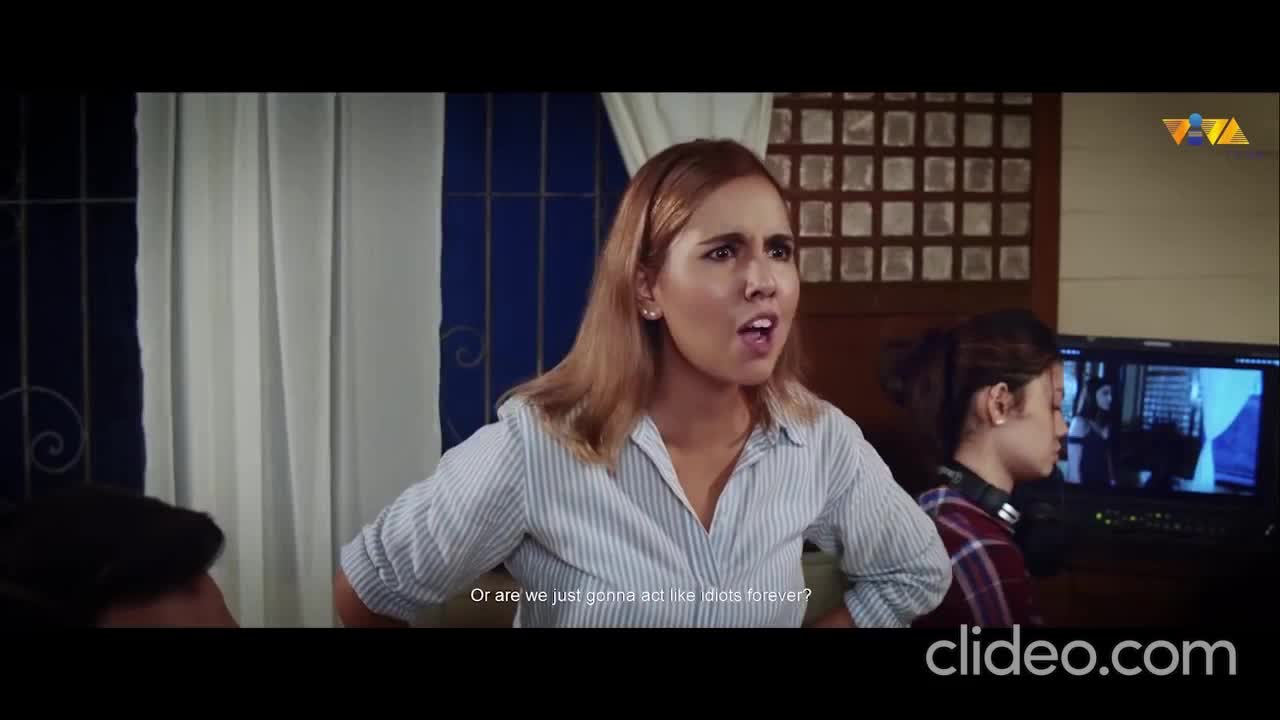

AU: AU12_r Emotion: Anger


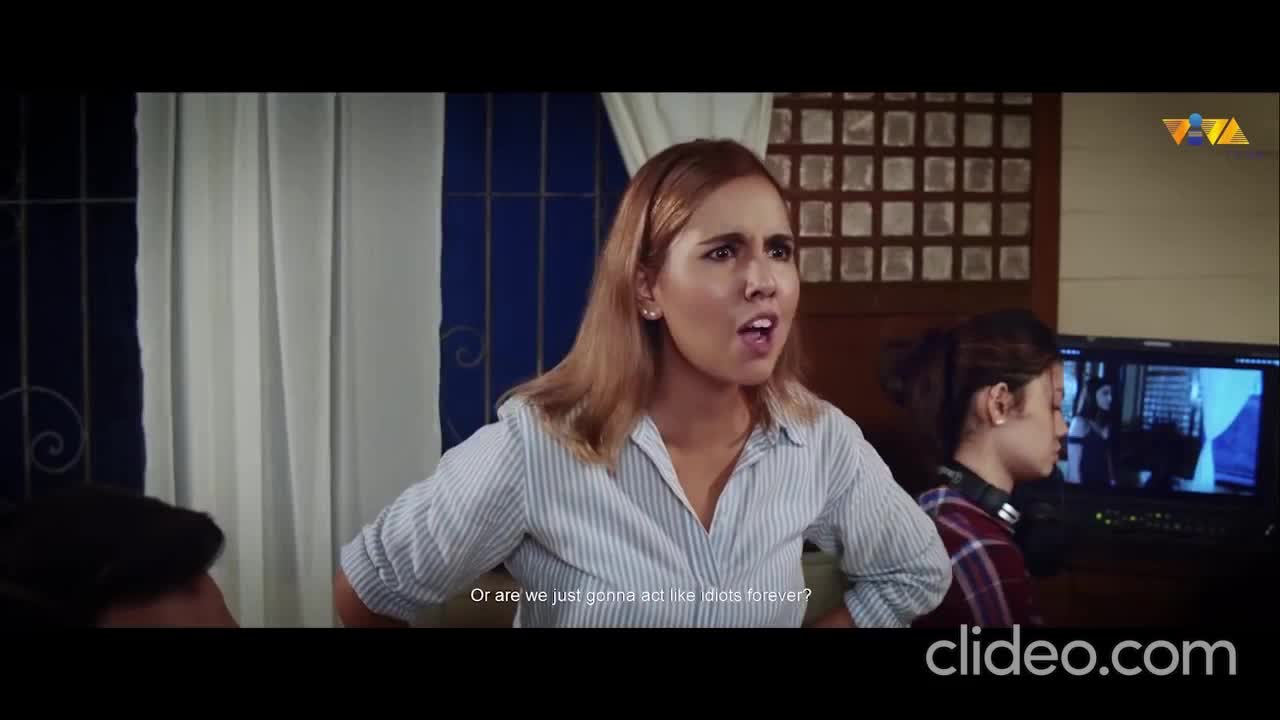

AU: AU14_r Emotion: Anger


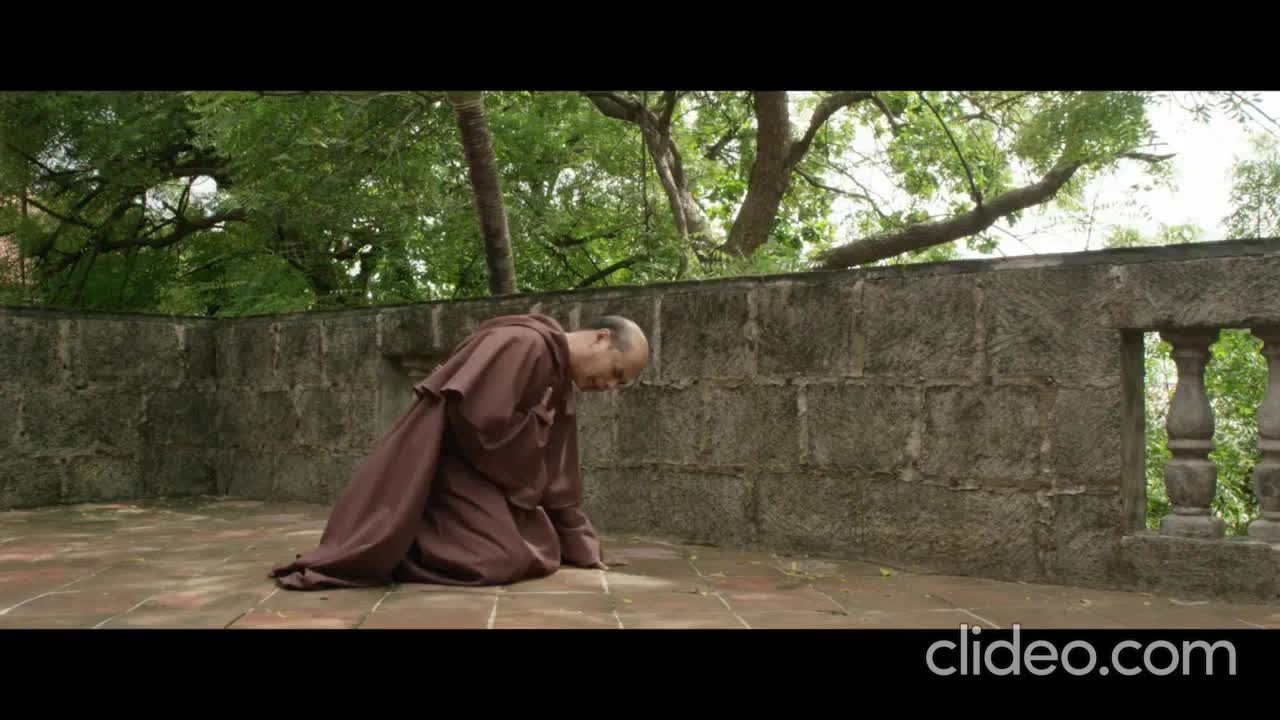

AU: AU15_r Emotion: Contempt


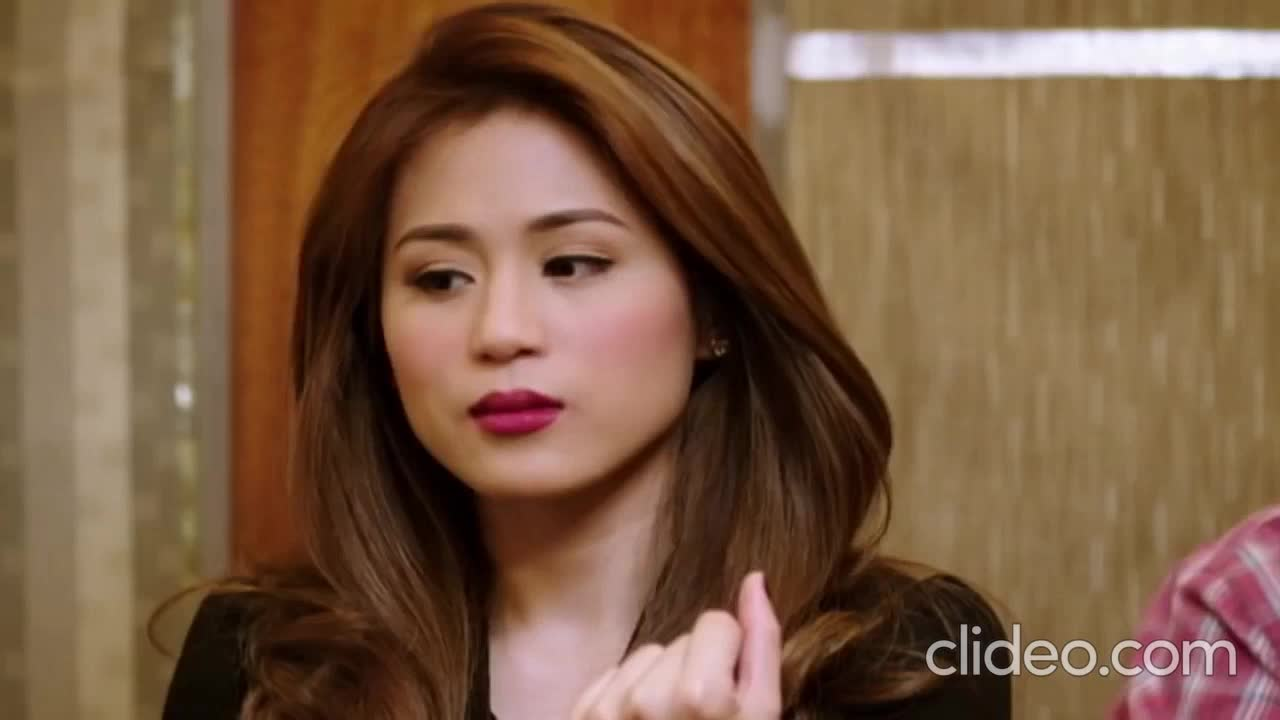

AU: AU17_r Emotion: Anger


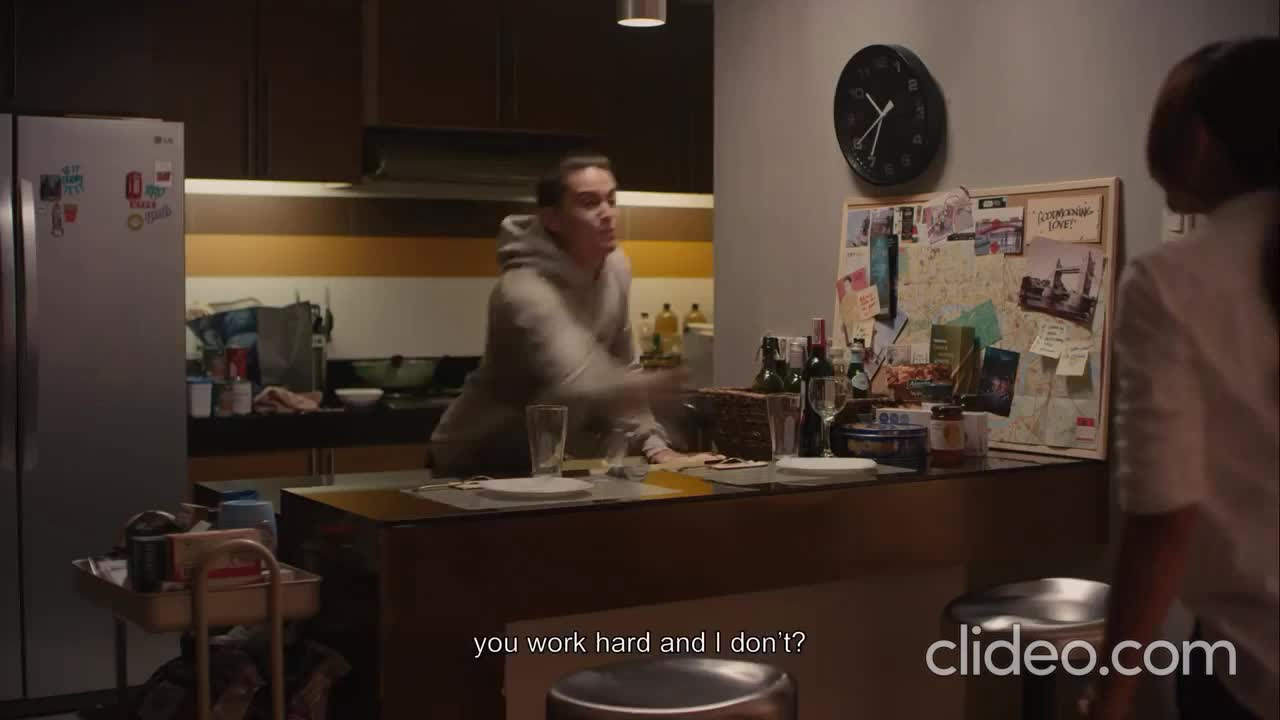

AU: AU23_r Emotion: Disgust


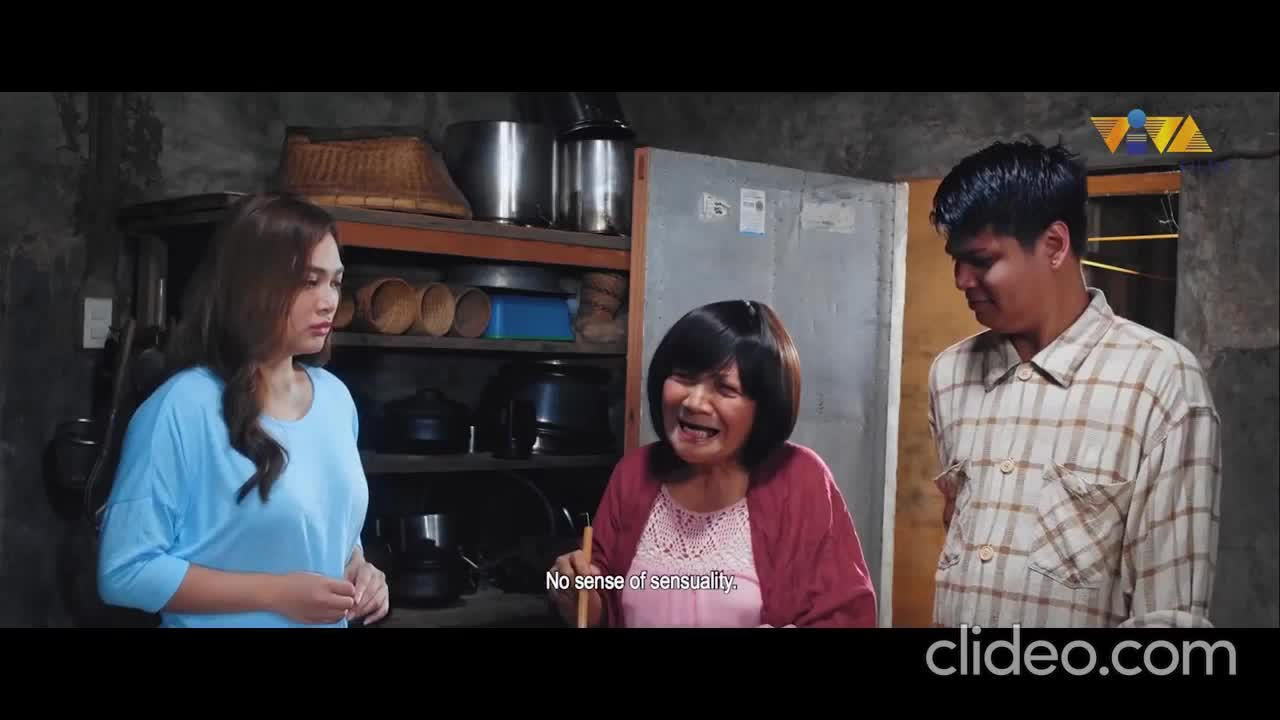

AU: AU25_r Emotion: Anger


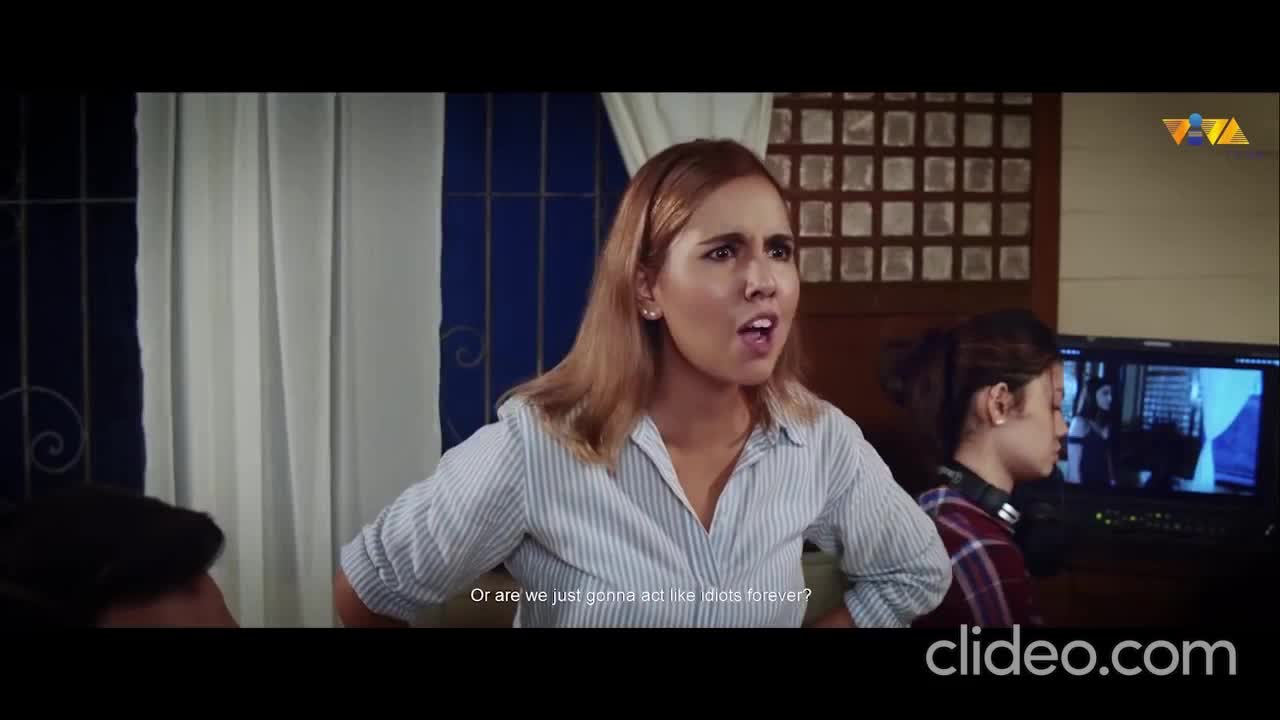

AU: AU26_r Emotion: Contempt


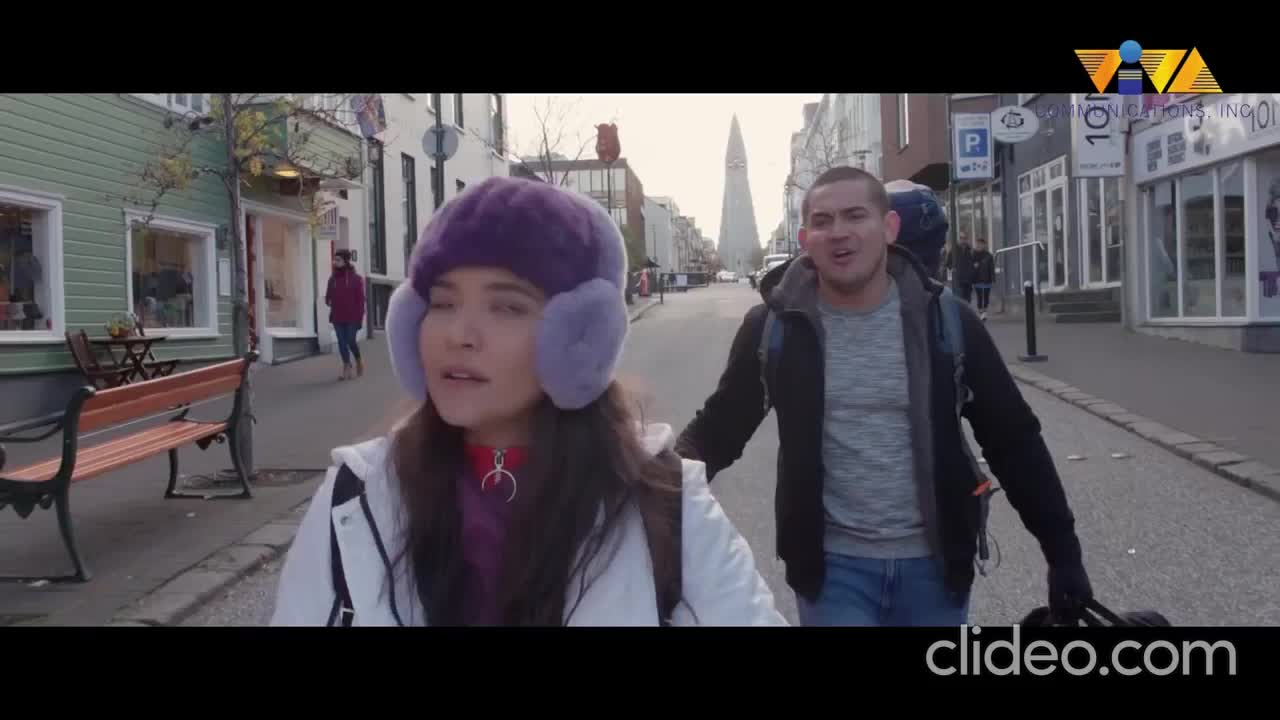

AU: AU45_r Emotion: Anger


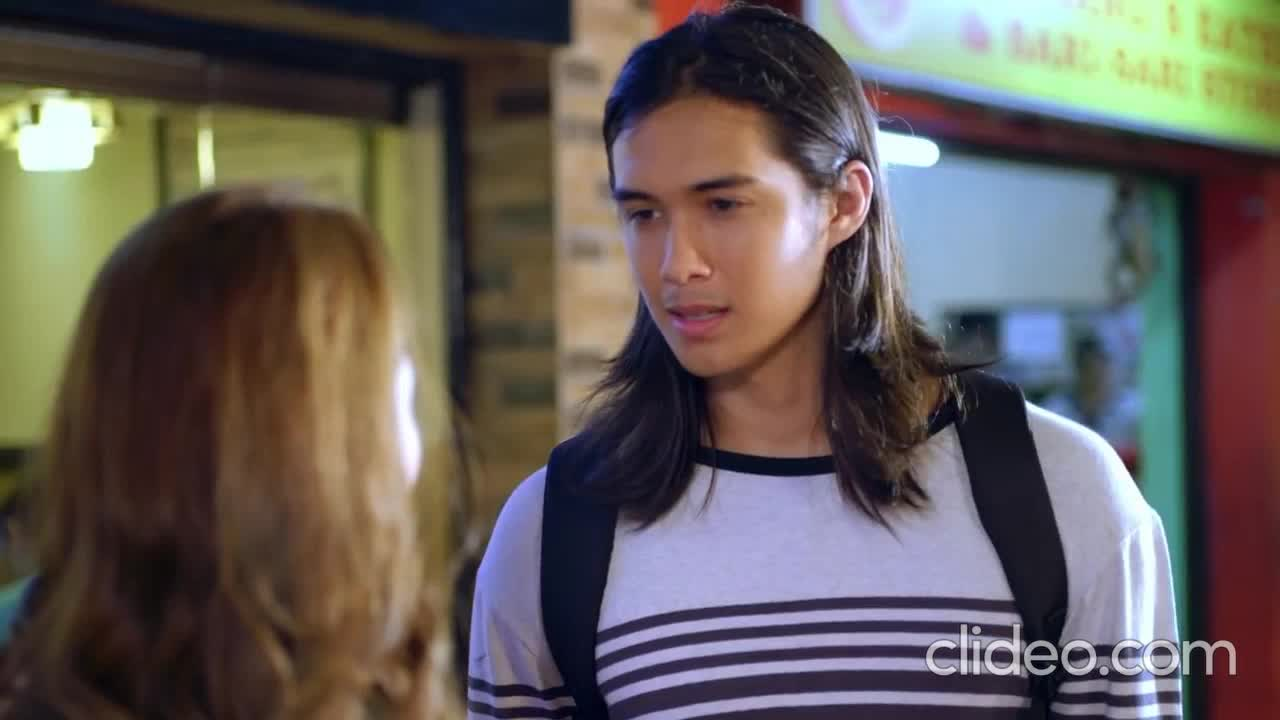

In [148]:
from glob import glob
import pandas as pd
from sklearn.mixture import GaussianMixture as GMM
import re
import os
from IPython.display import Image, display

contempt_images = glob("images/contempt/*.jpg")
anger_images = glob("images/anger/*.jpg")
disgust_images = glob("images/disgust/*.jpg")

#AU descriptions derived from https://imotions.com/blog/facial-action-coding-system/
AU_TO_DESCRIPTION = {
    
    'AU01' : 'Inner Brow Raiser',
    'AU02' : 'Outer Brow Raiser',
    'AU04' : 'Brow Lowerer',
    'AU05' : 'Upper Lid Raiser',
    'AU06' : 'Cheek Raiser',
    'AU07' : 'Lid Tightener',
    'AU09' : 'Nose Wrinkler',
    'AU10' : 'Upper Lip Raiser',
    'AU12' : 'Lip Corner Puller',
    'AU14' : 'Dimpler',
    'AU15' : 'Lip Corner Depressor',
    'AU17' : 'Chin Raiser',
    'AU20' : 'Lip Stretcher',
    'AU23' : 'Lip Tightener',
    'AU25' : 'Lips Part',
    'AU26' : 'Jaw Drop',
    'AU45' : 'Blink'
}

df = pd.read_csv("all_videos.csv")


df_na = df[df['culture'] == "North America"]


au_df_na = df_na
au_df_na = au_df_na.fillna(0)

au_df_na = au_df_na.drop('face_id', 1)
au_df_na = au_df_na.drop('confidence', 1)
au_df_na = au_df_na.drop('success', 1)
au_df_na = au_df_na.drop('frame', 1)
au_df_na = au_df_na.drop('culture', 1)
au_df_na = au_df_na.drop('emotion', 1)
au_df_na = au_df_na.drop('filename', 1)


gmm_na = GMM(16).fit(au_df_na)

probabilities_na = gmm.predict_proba(au_df_na)
prob_df_na = pd.DataFrame(probabilities_na)


df_pr = df[df['culture'] == "Persian"]

au_df_pr = df_pr
au_df_pr = au_df_pr.fillna(0)

au_df_pr = au_df_pr.drop('face_id', 1)
au_df_pr = au_df_pr.drop('confidence', 1)
au_df_pr = au_df_pr.drop('success', 1)
au_df_pr = au_df_pr.drop('frame', 1)
au_df_pr = au_df_pr.drop('culture', 1)
au_df_pr = au_df_pr.drop('emotion', 1)
au_df_pr = au_df_pr.drop('filename', 1)


gmm_pr = GMM(16).fit(au_df_pr)

probabilities_pr = gmm.predict_proba(au_df_pr)
prob_df_pr = pd.DataFrame(probabilities_pr)

df_ph = df[df['culture'] == "Philippines"]

au_df_ph = df_ph
au_df_ph = au_df_ph.fillna(0)

au_df_ph = au_df_ph.drop('face_id', 1)
au_df_ph = au_df_ph.drop('confidence', 1)
au_df_ph = au_df_ph.drop('success', 1)
au_df_ph = au_df_ph.drop('frame', 1)
au_df_ph = au_df_ph.drop('culture', 1)
au_df_ph = au_df_ph.drop('emotion', 1)
au_df_ph = au_df_ph.drop('filename', 1)


gmm_ph = GMM(16).fit(au_df_ph)

probabilities_ph = gmm.predict_proba(au_df_ph)
prob_df_ph = pd.DataFrame(probabilities_ph)


num_components = len(au_df_na.columns)



print("North America: \n")
for i in range(0, num_components):
    greatest_prob_index = prob_df_na[i].argmax()
    AU_column = i
    AU_number = au_df_na.columns[i]
    
    AU_name = au_df_na.columns[i]
    
    #print('AU Name: ' + AU_name, 'Index of greatest probability: ', greatest_prob_index)
    row = df_na.iloc[greatest_prob_index, :]
    #print(row)
    
    video_file_name = row['filename']
    video_culture = row['culture']
    video_emotion = row['emotion']
    video_frame = row['frame']
    
    #print(video_file_name)
    #print(video_culture)
    #print(video_emotion)
    #print(video_frame)
    
    

    
    if video_emotion == 'contempt' and video_culture == " North America":
        
        for image_file_path in contempt_images:
            image_file_name = os.path.basename(image_file_path)
            image_file_name_tokens = re.split(r'_|\.|\(|\)', image_file_name)
            
            video_file_name_tokens = re.split(r'_|\.|\(|\)', video_file_name)
            
            if(video_file_name == "contempt_7"):
                print('AU: ' + AU_number)
                #print(image_file_path)
                display(Image(filename="images/contempt\contempt_7_na (71).jpg"))
                break
               
            
            #na culture
            if "contempt" in image_file_name_tokens and "na " in image_file_name_tokens and video_file_name_tokens[0] == image_file_name_tokens[0] and video_file_name_tokens[1] == image_file_name_tokens[1] and image_file_name_tokens[3] == str(video_frame):
                #print(video_file_name)
                #print(image_file_name)

                    
                    

                print('AU: ' + AU_number + "Emotion: Contempt")
                display(Image(filename=image_file_path))
           
                
                
    elif video_emotion == 'disgust' and video_culture == "North America":
        for image_file_path in disgust_images:
            image_file_name = os.path.basename(image_file_path)
            image_file_name_tokens = re.split(r'_|\.|\(|\)', image_file_name)
            #print(image_file_name_tokens)
            
            video_file_name_tokens = re.split(r'_|\.|\(|\)', video_file_name)
            #na culture
            if "disgust" in image_file_name_tokens and "na " in image_file_name_tokens and video_file_name_tokens[0] == image_file_name_tokens[0] and video_file_name_tokens[1] == image_file_name_tokens[1] and image_file_name_tokens[3] == str(video_frame):
                #print(video_file_name)
                #print(image_file_name)

                    

                print('AU: ' + AU_number + " Emotion: Disgust")
                display(Image(filename=image_file_path))
                #print(image_file_name)
                
    elif video_emotion == 'anger' and video_culture == "North America":
        for image_file_path in anger_images:
            image_file_name = os.path.basename(image_file_path)
            image_file_name_tokens = re.split(r'_|\.|\(|\)', image_file_name)
            #print(image_file_name_tokens)
            
            video_file_name_tokens = re.split(r'_|\.|\(|\)', video_file_name)
            #na culture
            if "anger" in image_file_name_tokens and "na " in image_file_name_tokens and video_file_name_tokens[0] == image_file_name_tokens[0] and video_file_name_tokens[1] == image_file_name_tokens[1] and image_file_name_tokens[3] == str(video_frame):
                #print(video_file_name)
                #print(image_file_name)

                    

                print('AU: ' + AU_number + " Emotion: Anger")
                display(Image(filename=image_file_path))
                #print(image_file_name)
                
                
print("Persia: \n")
for i in range(0, num_components):
    greatest_prob_index = prob_df_pr[i].argmax()
    AU_column = i
    AU_number = au_df_pr.columns[i]
    
    AU_name = au_df_pr.columns[i]
    
    #print('AU Name: ' + AU_name, 'Index of greatest probability: ', greatest_prob_index)
    row = df_pr.iloc[greatest_prob_index, :]
    #print(row)
    
    video_file_name = row['filename']
    video_culture = row['culture']
    video_emotion = row['emotion']
    video_frame = row['frame']
    
    #print(video_file_name)
    #print(video_culture)
    #print(video_emotion)
    #print(video_frame)
    
    

    
    if video_emotion == 'contempt' and video_culture == "Persian":
        
        for image_file_path in contempt_images:
            image_file_name = os.path.basename(image_file_path)
            image_file_name_tokens = re.split(r'_|\.|\(|\)', image_file_name)
            
            video_file_name_tokens = re.split(r'_|\.|\(|\)', video_file_name)
            
            #print(image_file_name_tokens)
            #print(video_file_name_tokens)
         
            if "contempt" not in image_file_name_tokens:
                
                image_file_name_tokens[-2] = str(int(image_file_name_tokens[-2]))
            
            
            
            #pr culture
            if "contempt" not in image_file_name_tokens and "pr" in image_file_name_tokens and image_file_name_tokens[-2] == str(video_frame) and video_file_name_tokens[0] == image_file_name_tokens[0]:
         

                    
                    

                print('AU: ' + AU_number + "Emotion: Contempt")
                display(Image(filename=image_file_path))
           
                
                
    elif video_emotion == 'disgust' and video_culture == "Persian":
        for image_file_path in disgust_images:
            image_file_name = os.path.basename(image_file_path)
            image_file_name_tokens = re.split(r'_|\.|\(|\)', image_file_name)
            #print(image_file_name_tokens)
            
            video_file_name_tokens = re.split(r'_|\.|\(|\)', video_file_name)
            
            
            if "disgust" not in image_file_name_tokens:
                
                image_file_name_tokens[-2] = str(int(image_file_name_tokens[-2]))
            
            #pr culture
            if "disgust" not in image_file_name_tokens and "pr" in image_file_name_tokens and image_file_name_tokens[-2] == str(video_frame) and video_file_name_tokens[0] == image_file_name_tokens[0]:
                #print(video_file_name)
                #print(image_file_name)

                    

                print('AU: ' + AU_number + " Emotion: Disgust")
                display(Image(filename=image_file_path))
                #print(image_file_name)
                
    elif video_emotion == 'anger' and video_culture == "Persian":
        for image_file_path in anger_images:
            image_file_name = os.path.basename(image_file_path)
            image_file_name_tokens = re.split(r'_|\.|\(|\)', image_file_name)
            #print(image_file_name_tokens)
            
            video_file_name_tokens = re.split(r'_|\.|\(|\)', video_file_name)
            
            if(video_file_name == "19_1"):
                print('AU: ' + AU_number)
                #print(image_file_path)
                display(Image(filename="images/anger/19_1_pr_033.jpg"))
                break
            elif(video_file_name == "46_1"):
                print('AU: ' + AU_number)
                #print(image_file_path)
                display(Image(filename="images/anger/46_1_pr_011.jpg"))
                break
            elif(video_file_name == "8"):
                print('AU: ' + AU_number)
                #print(image_file_path)
                display(Image(filename="images/anger/8_pr_016.jpg"))
                break
            elif(video_file_name == "24"):
                print('AU: ' + AU_number)
                #print(image_file_path)
                display(Image(filename="images/anger/24_pr_025.jpg"))
                break
            elif(video_file_name == "52"):
                print('AU: ' + AU_number)
                #print(image_file_path)
                display(Image(filename="images/anger/52_pr_073.jpg"))
                break
            elif(video_file_name == "59"):
                print('AU: ' + AU_number)
                #print(image_file_path)
                display(Image(filename="images/anger/59_pr_078.jpg"))
                break
                
            
            
            if "anger" not in image_file_name_tokens:
                
                image_file_name_tokens[-2] = str(int(image_file_name_tokens[-2]))
            
            #pr culture
            if "anger" in image_file_name_tokens and "pr" in image_file_name_tokens and image_file_name_tokens[-2] == str(video_frame) and video_file_name_tokens[0] == image_file_name_tokens[0]:
                #print(video_file_name)
                #print(image_file_name)

                    

                print('AU: ' + AU_number + " Emotion: Anger")
                display(Image(filename=image_file_path))
                #print(image_file_name)
    
    
    
    
    

print("Philippines: \n")
for i in range(0, num_components):
    greatest_prob_index = prob_df_ph[i].argmax()
    
    AU_column = i
    AU_number = au_df_ph.columns[i]
    
    AU_name = au_df_ph.columns[i]
    
    #print('AU Name: ' + AU_name, 'Index of greatest probability: ', greatest_prob_index)
    row = df_ph.iloc[greatest_prob_index, :]
    #print(row)
    
    video_file_name = row['filename']
    video_culture = row['culture']
    video_emotion = row['emotion']
    video_frame = row['frame']
    
    #print(video_file_name)
    #print(video_culture)
    #print(video_emotion)
    #print(video_frame)


    
    if video_emotion == 'contempt' and video_culture == "Philippines":
        
        for image_file_path in contempt_images:
            image_file_name = os.path.basename(image_file_path)
            image_file_name_tokens = re.split(r'_|\.|\(|\)', image_file_name)
            
            video_file_name_tokens = re.split(r'_|\.|\(|\)', video_file_name)
            
            if len(image_file_name_tokens) == 5 and "contempt" in image_file_name_tokens:
                #print(image_file_name_tokens)
                #print(video_file_name_tokens)
                image_file_name_tokens[-3] = str(int(image_file_name_tokens[-3]))
            #print(video_file_name_tokens)
            #ph culture
            if "contempt" in image_file_name_tokens and image_file_name_tokens[-2] == "pr" and video_file_name_tokens[1] == image_file_name_tokens[1]:
    

                print('AU: ' + AU_number + " Emotion: Contempt")
                display(Image(filename=image_file_path))
                break
           
                
                
    elif video_emotion == 'disgust' and video_culture == "Philippines":
        for image_file_path in disgust_images:
            image_file_name = os.path.basename(image_file_path)
            image_file_name_tokens = re.split(r'_|\.|\(|\)', image_file_name)
            #print(image_file_name_tokens)
            
            video_file_name_tokens = re.split(r'_|\.|\(|\)', video_file_name)
            
            if len(image_file_name_tokens) == 5 and "disgust" in image_file_name_tokens:
                #print(image_file_name_tokens)
                #print(video_file_name_tokens)
                image_file_name_tokens[-3] = str(int(image_file_name_tokens[-3]))
                
            #na culture
            if "disgust" in image_file_name_tokens and image_file_name_tokens[-2] == "pr"  and video_file_name_tokens[1] == image_file_name_tokens[1]:
                #print(video_file_name)
                #print(image_file_name)

                    

                print('AU: ' + AU_number + " Emotion: Disgust")
                display(Image(filename=image_file_path))
                break
                #print(image_file_name)
                
    elif video_emotion == 'anger' and video_culture == "Philippines":
        for image_file_path in anger_images:
            image_file_name = os.path.basename(image_file_path)
            image_file_name_tokens = re.split(r'_|\.|\(|\)', image_file_name)
            #print(image_file_name_tokens)
            
            video_file_name_tokens = re.split(r'_|\.|\(|\)', video_file_name)
            
            if len(image_file_name_tokens) == 5 and "anger" in image_file_name_tokens:
                #print(image_file_name_tokens)
                #print(video_file_name_tokens)
                image_file_name_tokens[-3] = str(int(image_file_name_tokens[-3]))
                
            #na culture
            if "anger" in image_file_name_tokens and image_file_name_tokens[-2] == "pr"  and video_file_name_tokens[1] == image_file_name_tokens[1]:
                #print(video_file_name)
                #print(image_file_name)

                    

                print('AU: ' + AU_number + " Emotion: Anger")
                display(Image(filename=image_file_path))
                break
                #print(image_file_name)
    

            
